##### Loading Libraries

In [1]:
# Machine Learning Project

In [2]:
# Importing the necessary libraries
import sys
sys.path.append(r"C:\Users\Akash Mittal\Documents\GitHub\ML-Project\sources")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_process_scale import StandardScaling, TrainTestSplit, ZeroOneLoss
from perceptron_class import Perceptron
import SVM_pegasos
from Reg_log_class_2 import LogisticRegressionPegasos
from polynomial_features import PolynomialFeatureExpansion
from Kernel_Perceptron_F1 import KernelizedPerceptron
from Kernel_Pegasos_SVM_F2 import KernelizedPegasosSVM
from K_fold_CV import MyKFold # Custom Kfold CV
from GridSearch import cross_validate
from scipy.stats.mstats import winsorize


#### Data Loading and Exploration

In [3]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\Akash Mittal\\Documents\\GitHub\\ML-Project\\your_dataset.csv")

In [4]:
data.describe() # Descriptive statistics of the dataset

x1            x2            x3            x4            x5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       1.591298      0.515879     99.848936     -1.504139      0.077645   
std        1.321185      2.054488      0.710948      1.133605      0.707270   
min        0.002443     -7.524934     98.572455     -7.078939     -1.000000   
25%        0.524758     -0.883862     99.159314     -2.179713     -0.624710   
50%        1.276243      0.492813     99.802830     -1.262985      0.157145   
75%        2.352106      1.902003    100.549141     -0.605316      0.777856   
max        9.384223      8.302375    101.260768     -0.000003      1.000000   

                 x6            x7            x8            x9           x10  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.051823      0.975207      0.635194      0.051926    -55.447678   
std        0.704755      2.162237      2.212708      1.769646      0.710082   
min       -1.000000     -6.906971     -7.140755     -7.151890    -56.773931   
25%       -0.644261     -0.500506     -0.879985     -1.129665    -56.137679   
50%        0.101648      1.006918      0.624762      0.024726    -55.397208   
75%        0.754770      2.434886      2.098389      1.248961    -54.758351   
max        1.000000      8.760306      9.287266      6.211452    -54.208890   

                  y  
count  10000.000000  
mean      -0.001600  
std        1.000049  
min       -1.000000  
25%       -1.000000  
50%       -1.000000  
75%        1.000000  
max        1.000000

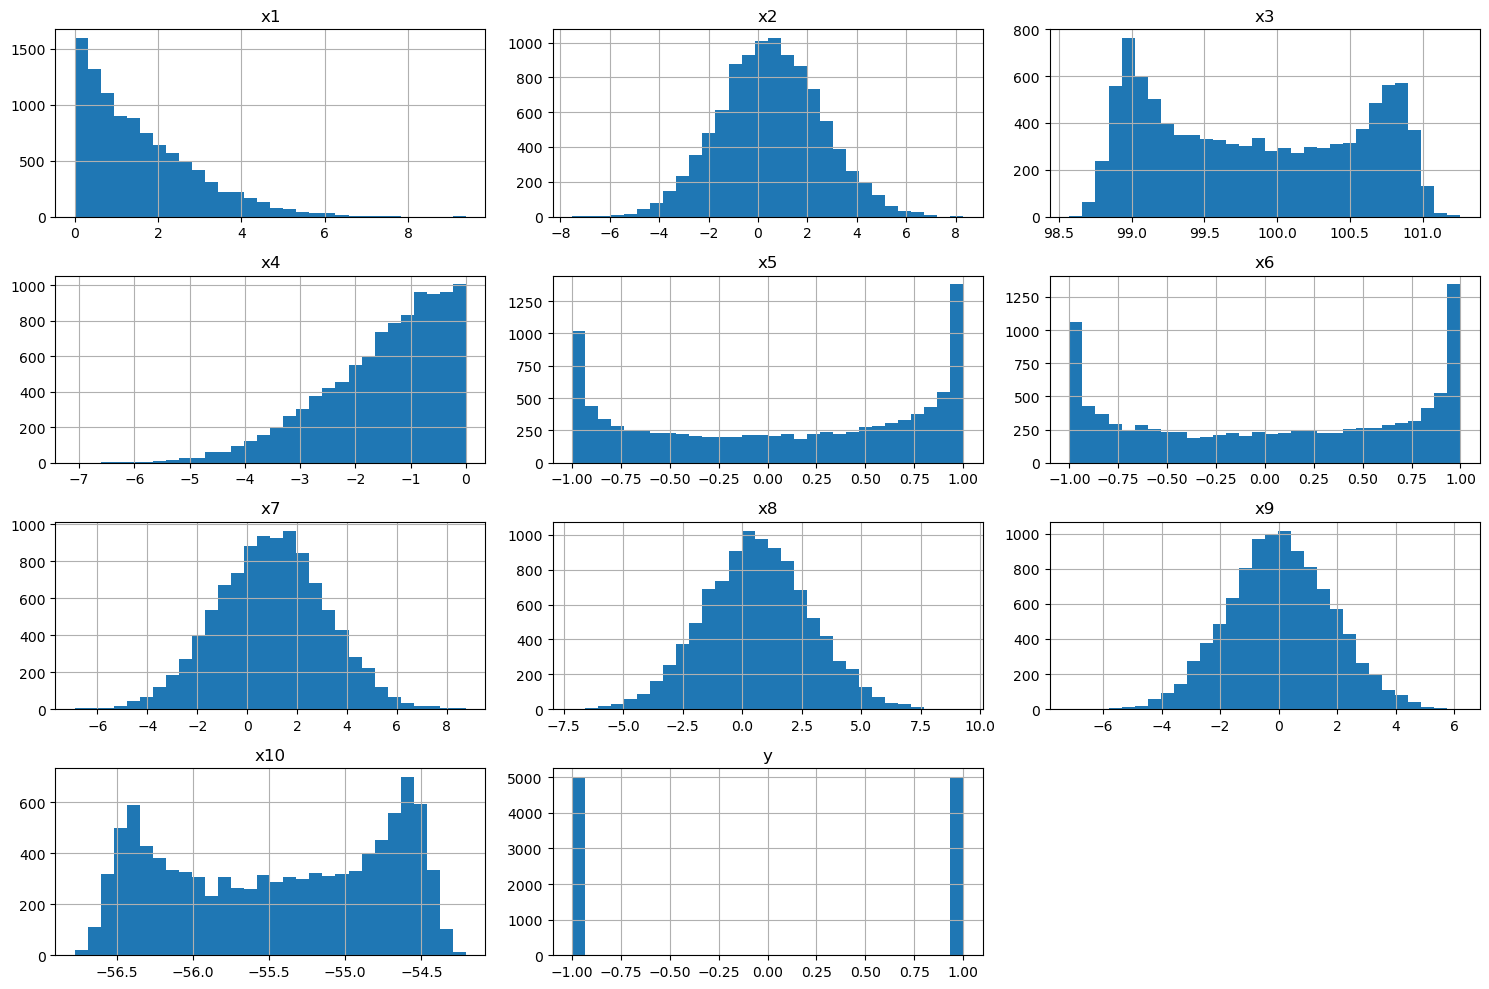

In [5]:
## Here there is no mention about the kind of data we have and what the features are. We just have numeric values and an output.
## So let's just worh that out in that way only
# since there are 10000 rows and 11 columns, it would be difficult to visualize the PairPlots, but let's try.
# Plot histograms of each feature
data.hist(figsize=(15, 10), bins=30) # Histograms of the features
plt.tight_layout()
plt.show()

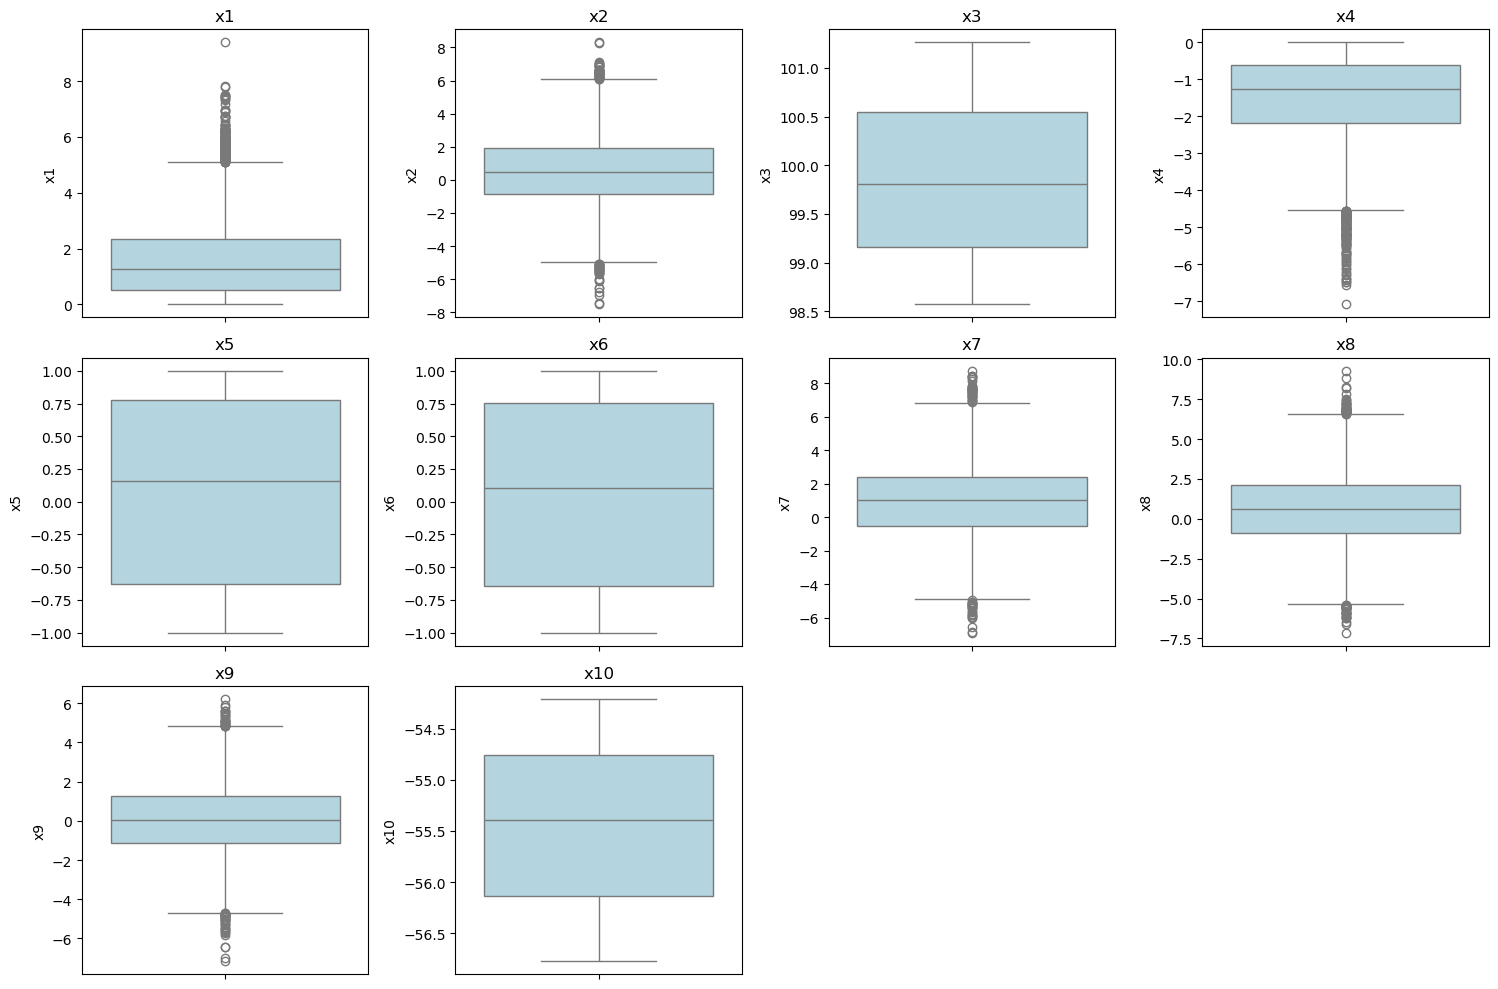

In [6]:
# Drawing BoxPlots
# Setting up the figure and axes
plt.figure(figsize=(15, 10))

# Loop through each column (excluding target variable 'y')
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i + 1) 
    sns.boxplot(y=data[column], color="lightblue") 
    plt.title(column)

# Adjusting layout and display the plot
plt.tight_layout()
plt.show()

In [7]:
## SInce there are outliers, we move on to take into account the outliers
# Either we can drop them, or we can use alpha-winsorized mean (a robust approach) to proceeed wtihout reducing the data.

file = data.copy() # Copying the original DataFrame (for abckup)

# Winsorize each feature (excluding target variable 'y')
for feature in file.columns[:-1]:  # Skip the last column 'y'
    file[feature] = winsorize(file[feature], limits=[0.025, 0.025])

# Display the Winsorized DataFrame
print(file.head())

         x1        x2          x3        x4        x5        x6        x7  \
0  1.205492  4.629092   98.837539 -1.075852  0.997927  0.911543  3.623558   
1  1.391530  3.611581   98.857197 -4.193522  0.677165  0.997728  3.413112   
2  1.692571 -0.887019  100.901276 -0.595548  0.177550 -0.915495  4.320264   
3  4.289320  1.416843  100.784735 -2.897154 -0.066972 -0.786173  2.093003   
4  0.542420 -1.010095  100.015580 -3.070705  0.088324 -0.242669  0.767942   

         x8        x9        x10  y  
0 -1.720267 -0.346191 -54.708330 -1  
1  4.253865  2.041603 -54.427603  1  
2  0.907834  3.126815 -56.397484 -1  
3  1.336237  2.183829 -56.197728  1  
4 -0.284683 -2.104145 -55.794045  1  


In [8]:
print(file.describe())

                 x1            x2            x3            x4            x5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       1.572112      0.514962     99.848782     -1.489706      0.077679   
std        1.260602      1.965702      0.706735      1.087999      0.707116   
min        0.056354     -3.467444     98.827801     -4.193522     -0.995714   
25%        0.524758     -0.883862     99.159314     -2.179713     -0.624710   
50%        1.276243      0.492813     99.802830     -1.262985      0.157145   
75%        2.352106      1.902003    100.549141     -0.605316      0.777856   
max        4.794936      4.629092    100.958786     -0.061796      0.997927   

                 x6            x7            x8            x9           x10  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.051860      0.973366      0.636535      0.053124    -55.447695   
std        0.704589      2.068095      2.114096    

c:\Users\Akash Mittal\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Akash Mittal\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Akash Mittal\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Akash Mittal\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Akash Mittal\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Akash Mittal\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition

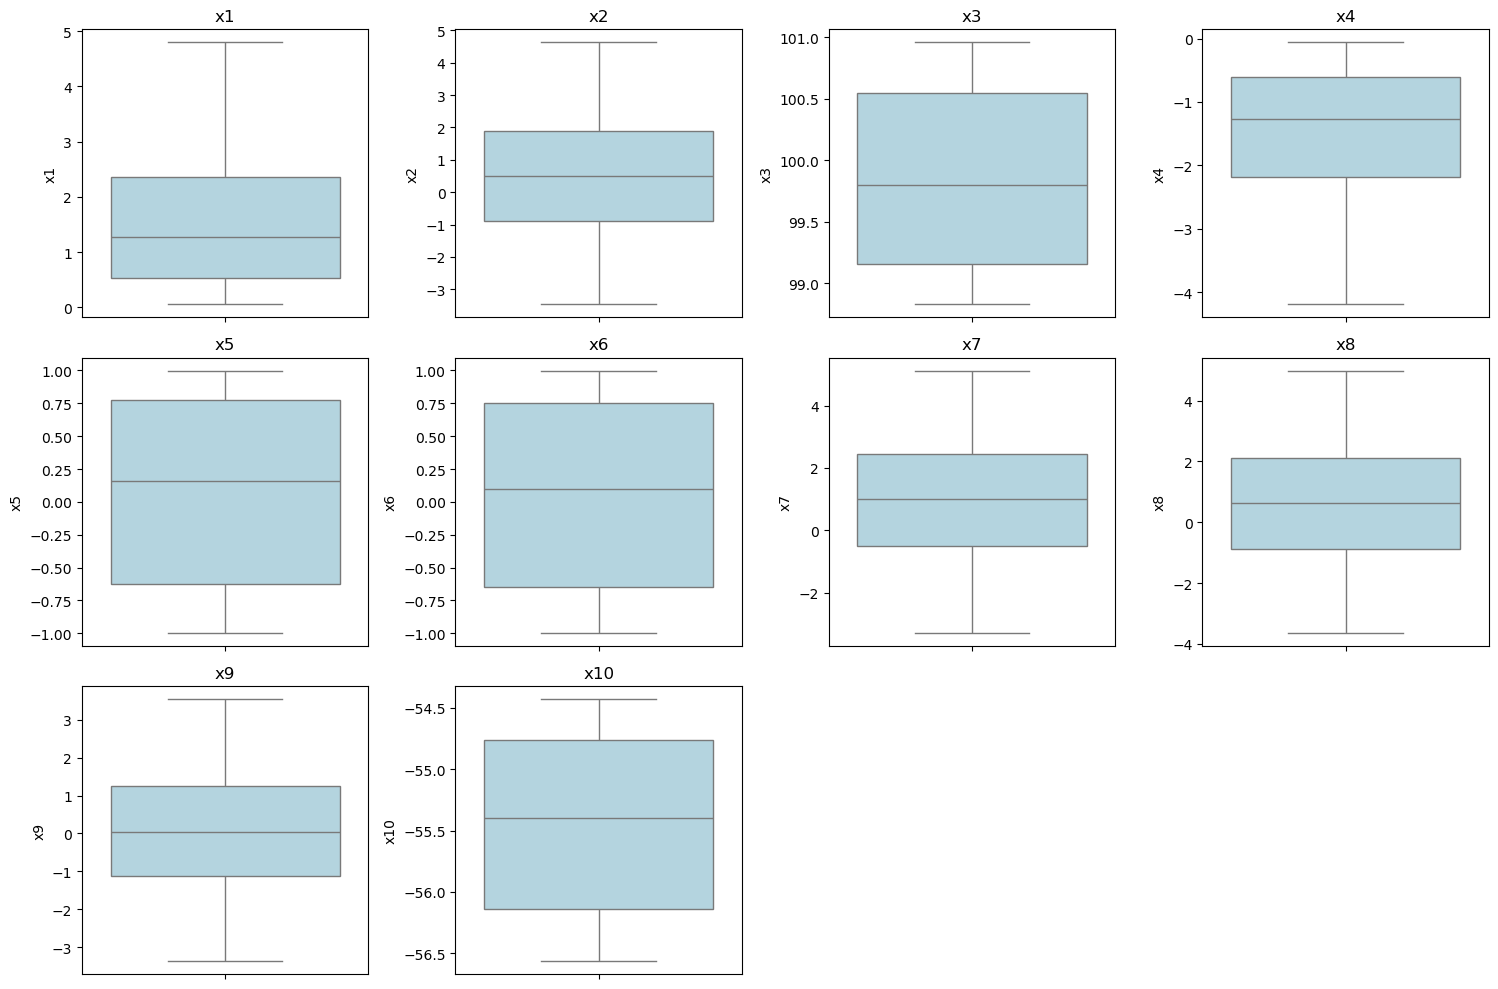

In [9]:
# Drawing BoxPlots
# Setting up the figure and axes
plt.figure(figsize=(15, 10))

# Loop through each column (excluding target variable 'y')
for i, column in enumerate(file.columns[:-1]):
    plt.subplot(3, 4, i + 1) 
    sns.boxplot(y=file[column], color="lightblue") 
    plt.title(column)

# Adjusting layout and display the plot
plt.tight_layout()
plt.show()

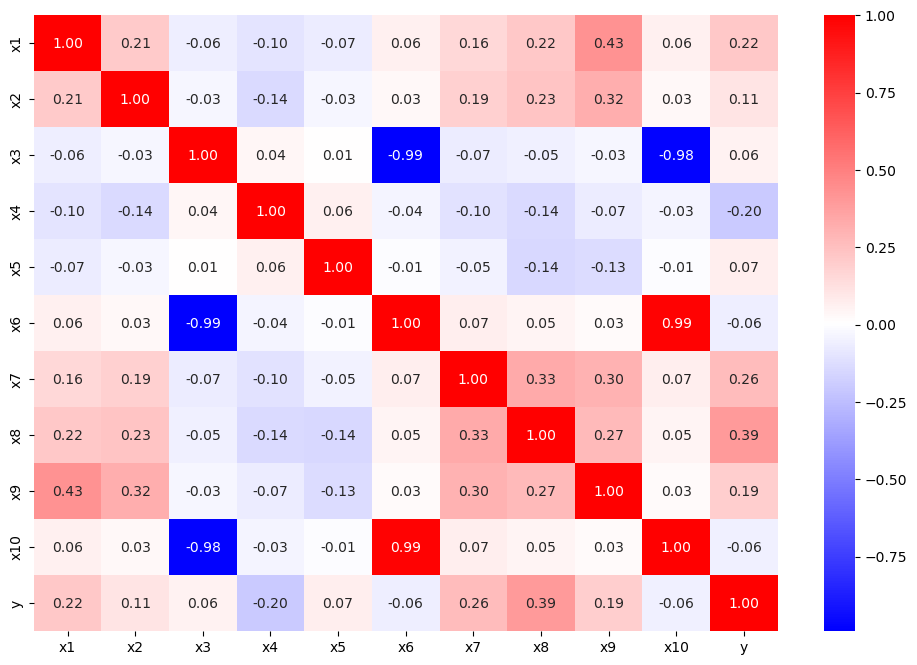

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(file.corr(), annot=True, fmt=".2f", cmap="bwr")
plt.show()

In [11]:
# Creating a new column to separate the values of 'y' for coloring and Plotting the Pair Plots for the variables
file['y_class'] = file['y'].apply(lambda x: 'Class 1' if x == 1 else 'Class 2')

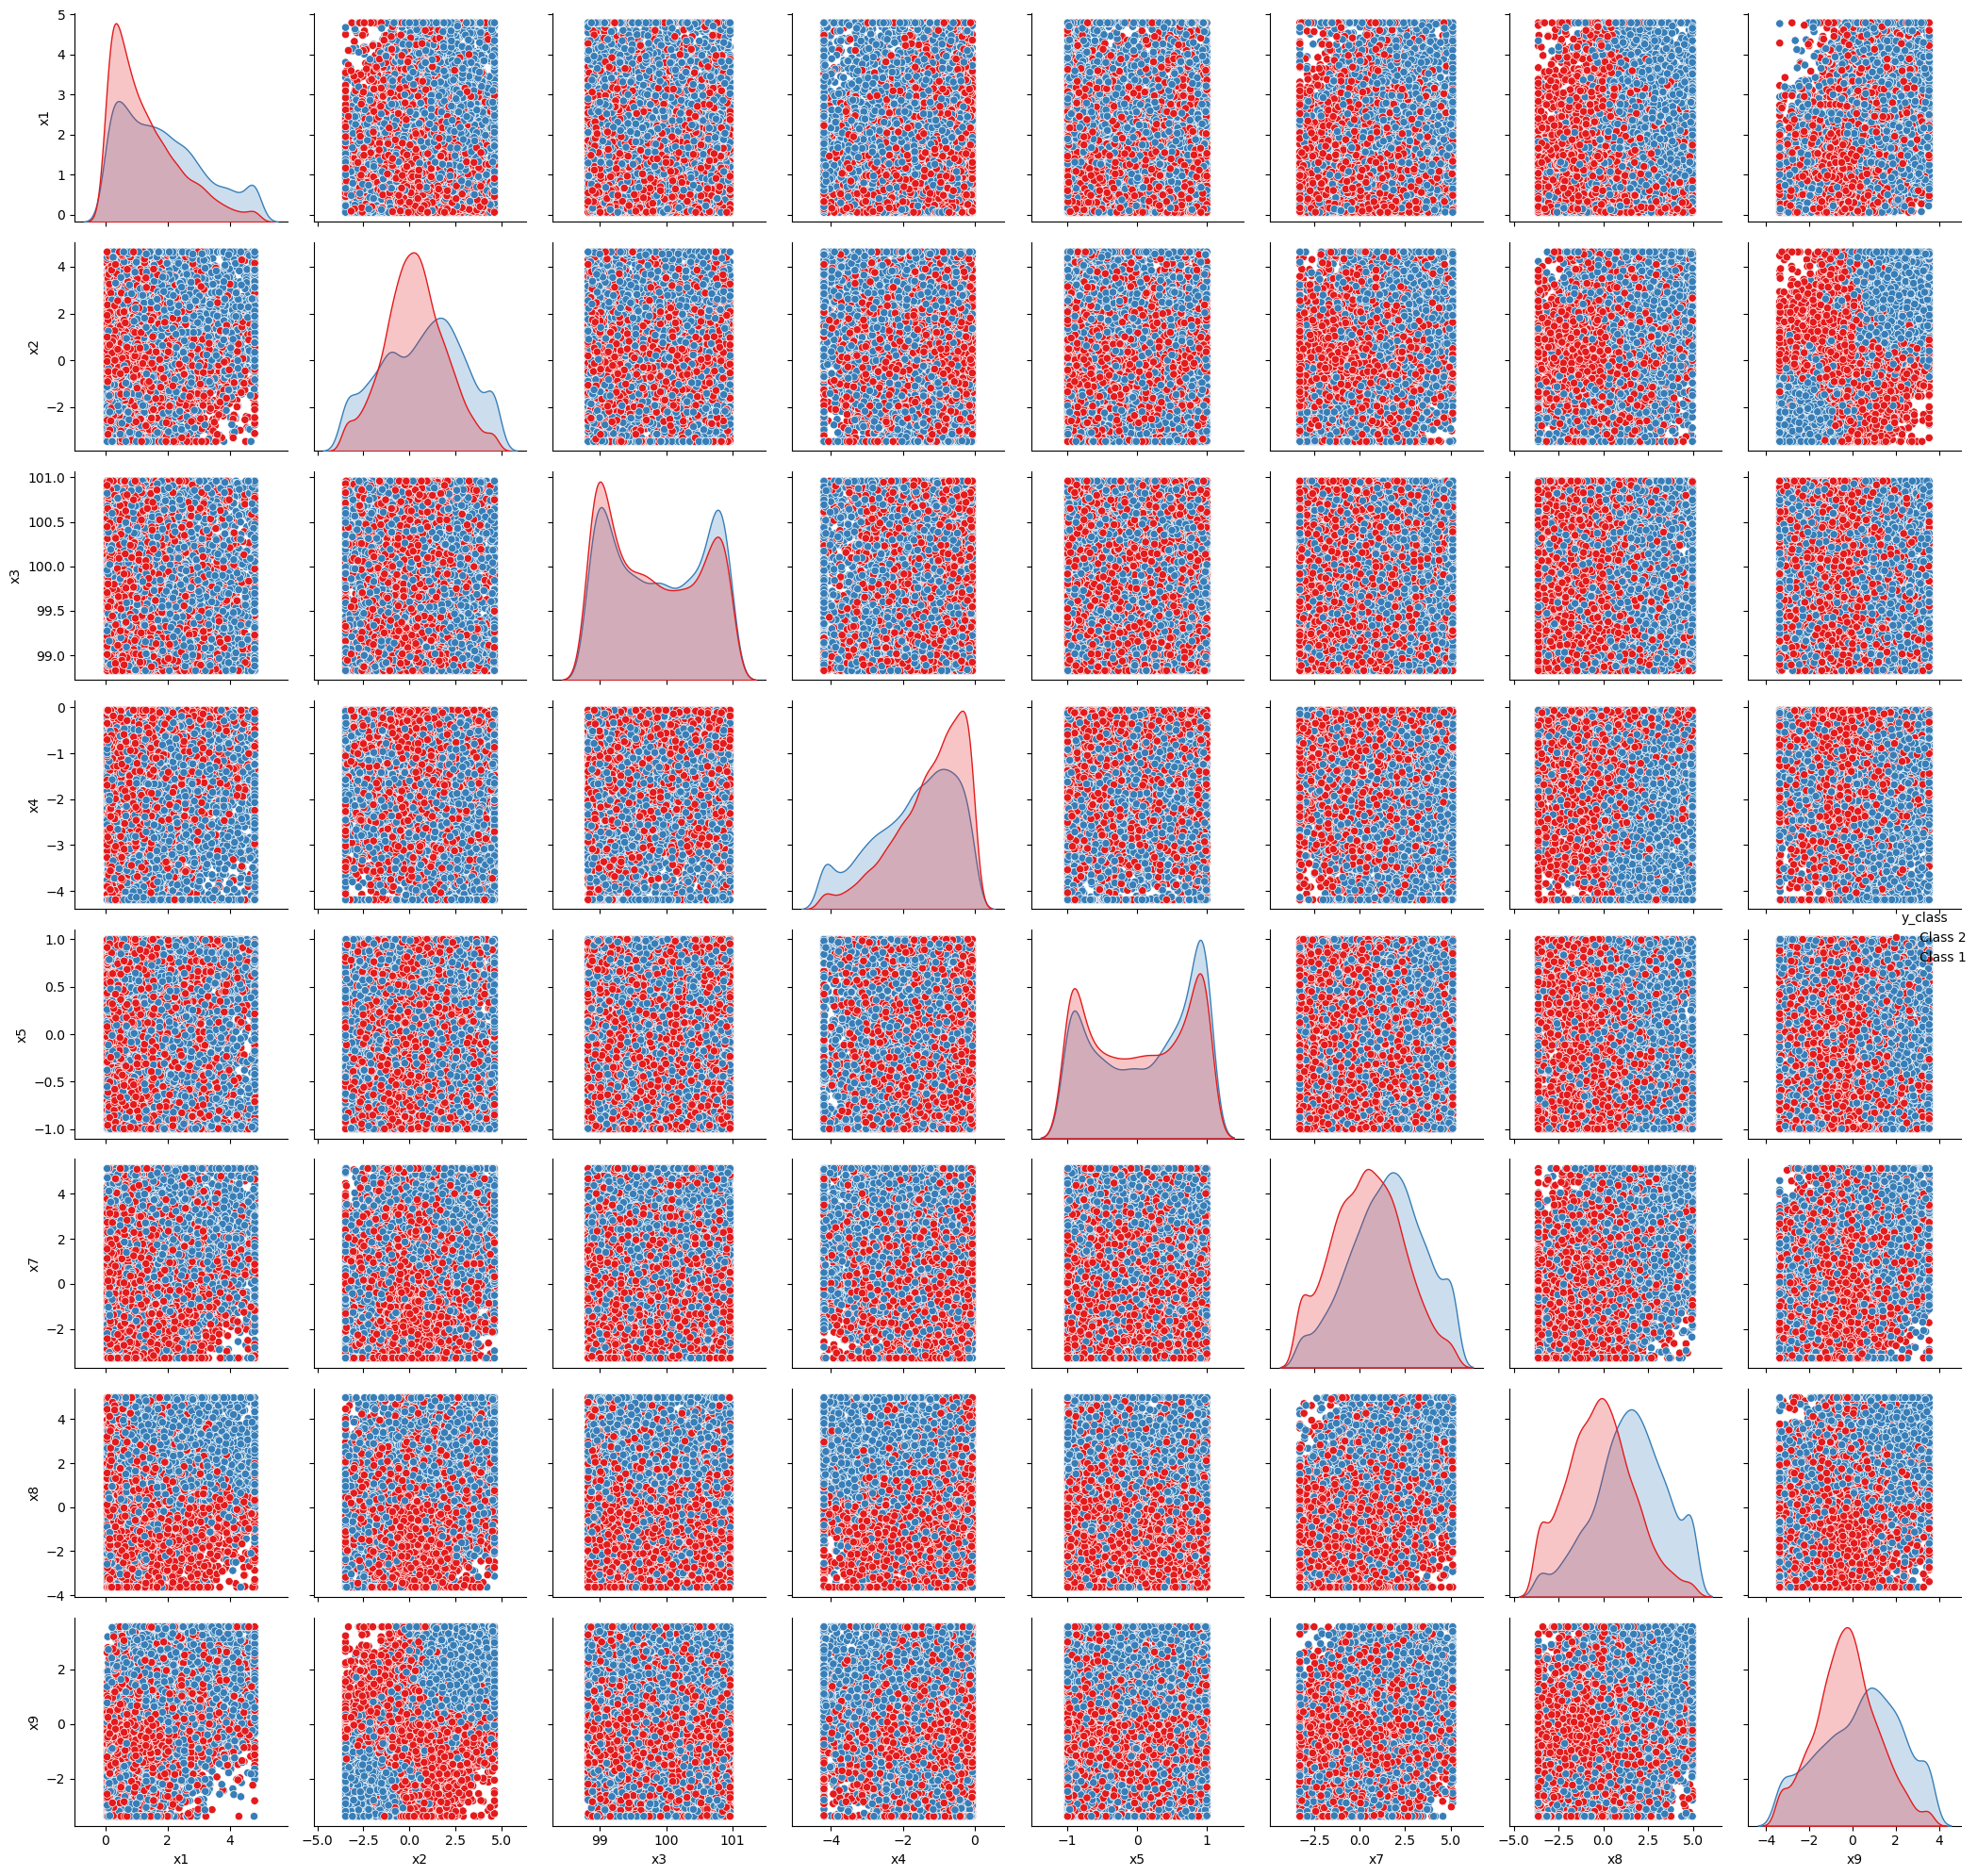

In [12]:
# Using Seaborn's pairplot to create pairwise scatter plots
sns.pairplot(file, hue='y_class', vars=['x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9'],
             palette='Set1')

# layout of Plot
plt.tight_layout()
plt.show()

In [13]:
# Drop highly correlated features (dropping x6, x10)
X_reduced = file.drop(columns=['x6', 'x10', 'y_class'])
#X_reduced

In [14]:
# Splitting the data
# instance of class for stratified splitting for balancing data
splitter = TrainTestSplit(test_size=0.25, random_state=42, stratify=True)
X_train, y_train, X_test, y_test = splitter.split(X_reduced)

#### Splitting the Data into training and test sets.

In [15]:
# Standardize features (fitting only on training data to avoid data leakage)
scaler = StandardScaling()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting to Arrays
X_train = X_train.to_numpy(dtype=np.float64)
X_test = X_test.to_numpy(dtype=np.float64)
y_train = y_train.to_numpy(dtype=np.float64)
y_test = y_test.to_numpy(dtype=np.float64)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 8)
(2500, 8)
(7500,)
(2500,)


In [17]:
# Unique Labels in Training and Test Set
print(np.unique(y_train))
print(np.unique(y_test))


[-1.  1.]
[-1.  1.]


In [18]:
loss_calculator = ZeroOneLoss()

### Perceptron Model

##### Parameter Grid

In [19]:
# Perceptron Parameter Grid
perceptron_param_grid = {
    'learning_rate': [ 0.01, 0.1, 1],
    'epochs': [50, 100, 200, 500],
    'activation_func': ['sign'],
}

##### Model Training

In [107]:
# Model Cross-Validated
print("\nGrid Search for Perceptron...")
best_params_perceptron, best_score_perceptron, best_cv_perceptron, history_perceptron = cross_validate(
    model_class=Perceptron,
    param_grid=perceptron_param_grid,
    X=X_train,
    y=y_train,
    k=5,
    shuffle=True,
    random_state=42,
    verbose=True
)


Grid Search for Perceptron...
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 50, 'activation_func': 'sign'}
Mean Score: 0.6627, Std Dev: 0.0320, CV: 0.0483
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 100, 'activation_func': 'sign'}
Mean Score: 0.6357, Std Dev: 0.0171, CV: 0.0269
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 200, 'activation_func': 'sign'}
Mean Score: 0.6460, Std Dev: 0.0080, CV: 0.0124
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 500, 'activation_func': 'sign'}
Mean Score: 0.6555, Std Dev: 0.0131, CV: 0.0199
Testing Hyperparameters: {'learning_rate': 0.1, 'epochs': 50, 'activation_func': 'sign'}
Mean Score: 0.6627, Std Dev: 0.0320, CV: 0.0483
Testing Hyperparameters: {'learning_rate': 0.1, 'epochs': 100, 'activation_func': 'sign'}
Mean Score: 0.6357, Std Dev: 0.0171, CV: 0.0269
Testing Hyperparameters: {'learning_rate': 0.1, 'epochs': 200, 'activation_func': 'sign'}
Mean Score: 0.6460, Std Dev: 0.0080, CV: 0.0124
T

##### Best Model and Test Accuracy

In [110]:
perceptron_best = Perceptron(**best_params_perceptron)
weights_p, bias_p = perceptron_best.fit(X_train, y_train)
y_pred_best = perceptron_best.predict(X_test)
accuracy_best_p = perceptron_best.accuracy(X_test, y_test)
loss_best_p = loss_calculator.compute_loss(y_test, y_pred_best)

print(f"Test Accuracy for Perceptron with Best Hyperparameters: {accuracy_best_p:.4f}")
print(f"Loss for Perceptron with Best Hyperparameters: {loss_best_p:.4f}")

Test Accuracy for Perceptron with Best Hyperparameters: 0.5000
Loss for Perceptron with Best Hyperparameters: 0.5000


##### Plots

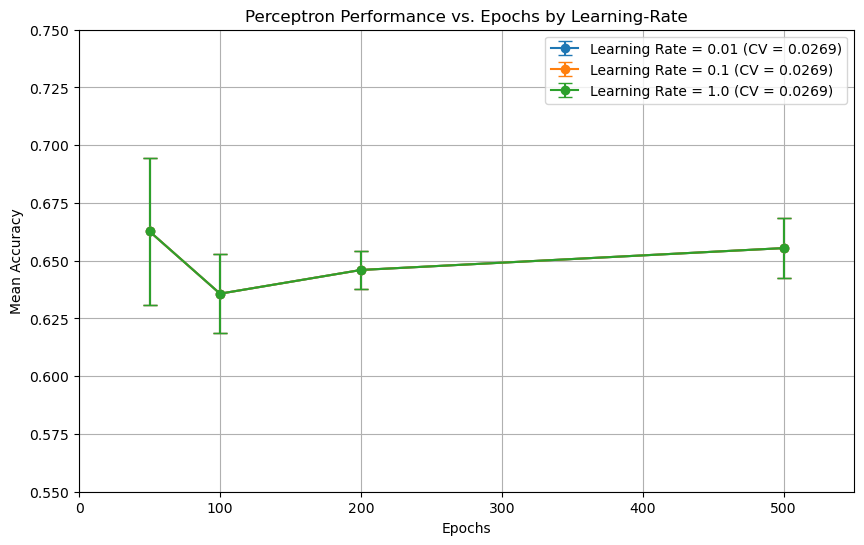

In [113]:
# Mean Accuracy by Epochs with Standard deviation

# Convert history_perceptron to a DataFrame
history_perceptron = pd.DataFrame(history_perceptron)

# Extract 'learning_rate' and 'epochs' from the 'params' column
history_perceptron['learning_rate'] = history_perceptron['params'].apply(lambda x: x['learning_rate'])
history_perceptron['epochs'] = history_perceptron['params'].apply(lambda x: x['epochs'])

# Plot
plt.figure(figsize=(10, 6))
for lr in history_perceptron['learning_rate'].unique():
    subset = history_perceptron[history_perceptron['learning_rate'] == lr].sort_values(by='epochs')
    plt.errorbar(
        subset['epochs'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Learning Rate = {lr} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

plt.xlim(0, 550)  # Set x-axis range (0 to 550)
plt.ylim(0.55, 0.75)  # Set y-axis range (0.55 to 0.70)

plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Perceptron Performance vs. Epochs by Learning-Rate')
plt.legend()
plt.grid(True)
plt.show()

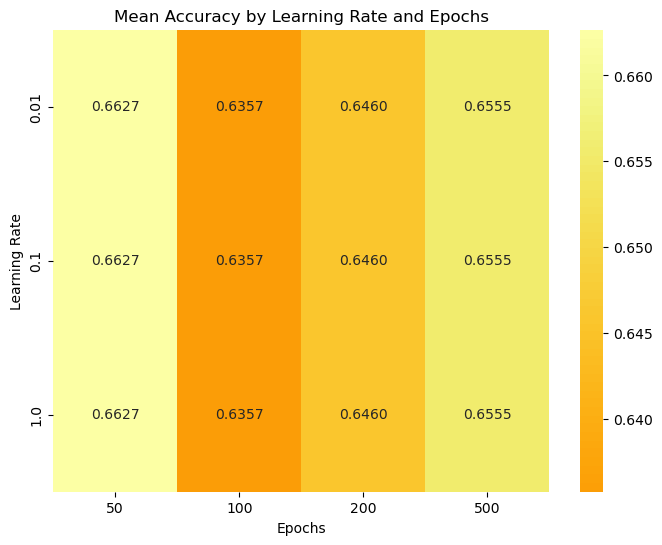

In [119]:
# Convert history_perceptron to a DataFrame for easier plotting
history_df = pd.DataFrame(history_perceptron)

# Extract 'learning_rate' and 'epochs' from the 'params' column
history_df['learning_rate'] = history_df['params'].apply(lambda x: x['learning_rate'])
history_df['epochs'] = history_df['params'].apply(lambda x: x['epochs'])

# Create a pivot table for the heatmap
heatmap_data = history_df.pivot_table(
    index='learning_rate',
    columns='epochs',
    values='mean_score'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='inferno', center=0.6)
plt.title('Mean Accuracy by Learning Rate and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.show()

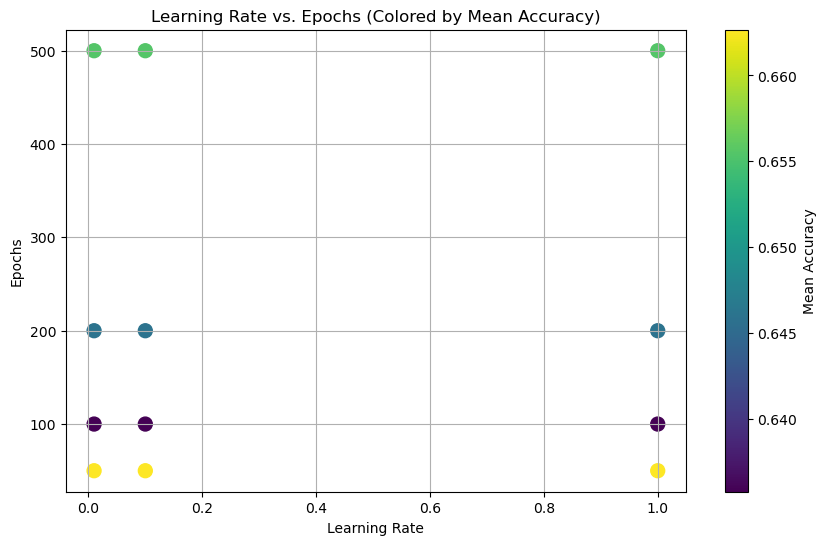

In [24]:
# Learning Rate & Epochs with Mean Accuracy

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    history_df['learning_rate'],
    history_df['epochs'],
    c=history_df['mean_score'],
    cmap='viridis',
    s=100  # Size of points
)
plt.colorbar(scatter, label='Mean Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')
plt.title('Learning Rate vs. Epochs (Colored by Mean Accuracy)')
plt.grid(True)
plt.show()

### End of Perceptron

### SVM Model with Pegasos

##### Parameter Grid

In [121]:
# SVM Pegasos Grid
svm_pegasos_param_grid = {
    'lambda_param': [0.01, 0.1, 1],
    'epochs': [50, 100, 200, 500]
}

##### Model Training

In [122]:
# Model
print("\nGrid Search for Pegasos SVM...")
best_params_svm_pegasos, best_score_svm_pegasos, best_cv_svm_pegasos, history_svm_pegasos = cross_validate(
    model_class=SVM_pegasos.SVM_Pegasos,
    param_grid=svm_pegasos_param_grid,
    X=X_train,
    y=y_train,
    k=5,
    shuffle=True,
    random_state=42,
    verbose=True
)


Grid Search for Pegasos SVM...
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 50}
Mean Score: 0.7247, Std Dev: 0.0115, CV: 0.0159
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 100}
Mean Score: 0.7252, Std Dev: 0.0120, CV: 0.0166
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 200}
Mean Score: 0.7252, Std Dev: 0.0120, CV: 0.0166
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 500}
Mean Score: 0.7253, Std Dev: 0.0122, CV: 0.0168
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 50}
Mean Score: 0.7245, Std Dev: 0.0143, CV: 0.0197
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 100}
Mean Score: 0.7248, Std Dev: 0.0145, CV: 0.0200
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 200}
Mean Score: 0.7249, Std Dev: 0.0143, CV: 0.0197
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 500}
Mean Score: 0.7249, Std Dev: 0.0143, CV: 0.0197
Testing Hyperparameters: {'lambda_param': 1, 'epochs': 50}
Mean Score: 0.7191, Std Dev

##### Best Model and Test Accuracy

In [123]:
svm_pegasos_best = SVM_pegasos.SVM_Pegasos(**best_params_svm_pegasos)
svm_pegasos_best.fit(X_train, y_train)

y_pred_svm_pegasos = svm_pegasos_best.predict(X_test) # Predictions

accuracy_svm_pegasos = svm_pegasos_best.score(X_test, y_test) # Accuracy
print(f"Test Accuracy for Pegasos SVM with Best Hyperparameters: {accuracy_svm_pegasos:.4f}")

loss_best_svm = loss_calculator.compute_loss(y_test, y_pred_svm_pegasos) # loss (0-1)

print(f"Loss for SVM with Best Hyperparameters: {loss_best_svm:.4f}")

Test Accuracy for Pegasos SVM with Best Hyperparameters: 0.7476
Loss for SVM with Best Hyperparameters: 0.2524


##### Plots

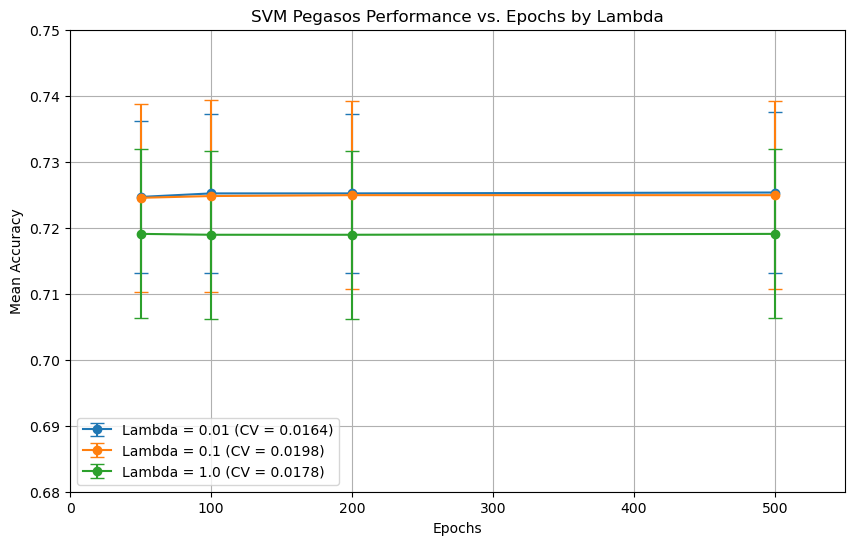

In [124]:
# Mean Accuracy by Epochs with Standard deviation

# Convert history_svm_pegasos to a DataFrame
history_df_svm = pd.DataFrame(history_svm_pegasos)

# Extract 'lambda_param' and 'epochs' from the 'params' column
history_df_svm['lambda_param'] = history_df_svm['params'].apply(lambda x: x['lambda_param'])
history_df_svm['epochs'] = history_df_svm['params'].apply(lambda x: x['epochs'])

# Plot
plt.figure(figsize=(10, 6))
for lr in history_df_svm['lambda_param'].unique():
    subset = history_df_svm[history_df_svm['lambda_param'] == lr].sort_values(by='epochs')
    plt.errorbar(
        subset['epochs'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Lambda = {lr} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

plt.xlim(0, 550)  # Set x-axis range (0 to 550)
plt.ylim(0.68, 0.75)  # Set y-axis range (0.68 to 0.75)


plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.title('SVM Pegasos Performance vs. Epochs by Lambda')
plt.legend()
plt.grid(True)
plt.show()

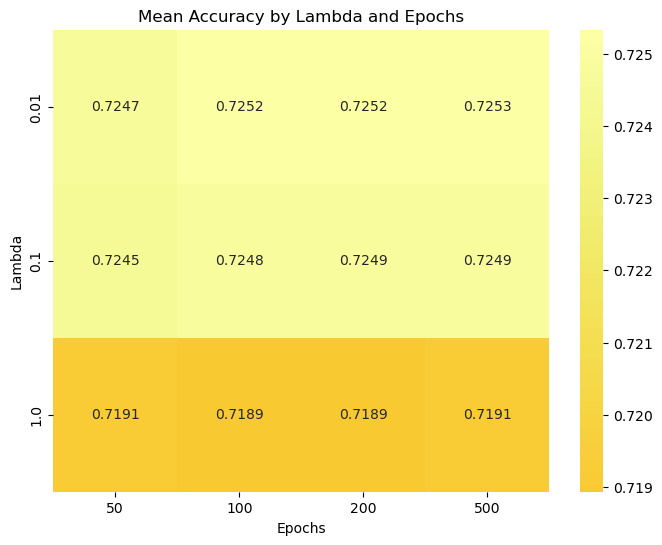

In [125]:
# HeatMap
# Create a pivot table for the heatmap
heatmap_data = history_df_svm.pivot_table(
    index='lambda_param',
    columns='epochs',
    values='mean_score'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='inferno', center=0.7)
plt.title('Mean Accuracy by Lambda and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Lambda')
plt.show()

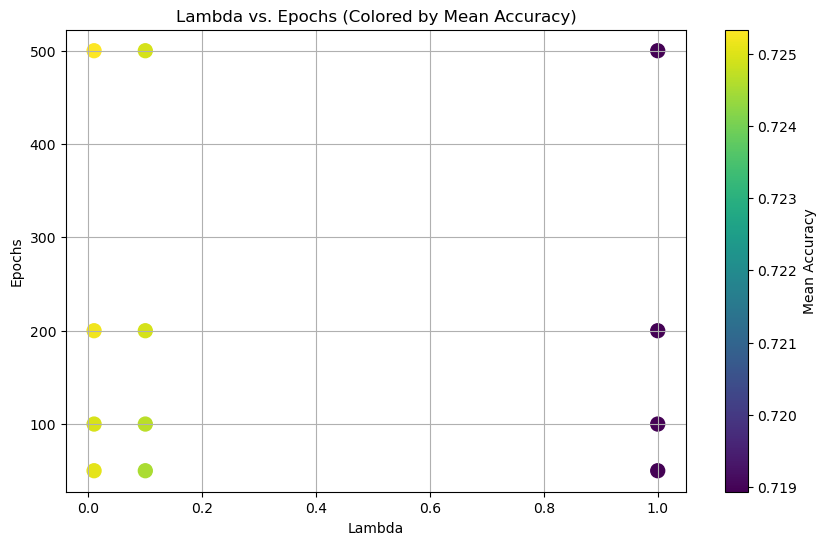

In [30]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    history_df_svm['lambda_param'],
    history_df_svm['epochs'],
    c=history_df_svm['mean_score'],
    cmap='viridis',
    s=100  # Size of points
)
plt.colorbar(scatter, label='Mean Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Epochs')
plt.title('Lambda vs. Epochs (Colored by Mean Accuracy)')
plt.grid(True)
plt.show()

### End of SVM (Pegasos)

### Regularized Logistic with Pegasos

##### Parameter Grid

In [31]:
# Logistic Parameter Grid
logreg_pegasos_param_grid = {
    'lambda_param': [0.01, 0.1, 1],
    'epochs': [50, 100, 200, 500]
}

##### Model Training

In [32]:
# Grid Search for Logistic Regression Pegasos
print("\nGrid Search for Logistic Regression Pegasos...")
best_params_logreg_pegasos, best_score_lgpeg, best_cv_lgpeg, history_lgpeg = cross_validate(
    model_class=LogisticRegressionPegasos,
    param_grid=logreg_pegasos_param_grid,
    X=X_train,
    y=y_train,
    k=5,
    shuffle=True,
    random_state=42,
    verbose=True
)


Grid Search for Logistic Regression Pegasos...
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 50}
Mean Score: 0.7181, Std Dev: 0.0088, CV: 0.0123
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 100}
Mean Score: 0.7180, Std Dev: 0.0089, CV: 0.0123
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 200}
Mean Score: 0.7183, Std Dev: 0.0092, CV: 0.0128
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 500}
Mean Score: 0.7183, Std Dev: 0.0093, CV: 0.0130
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 50}
Mean Score: 0.7184, Std Dev: 0.0104, CV: 0.0145
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 100}
Mean Score: 0.7184, Std Dev: 0.0104, CV: 0.0145
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 200}
Mean Score: 0.7184, Std Dev: 0.0104, CV: 0.0145
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 500}
Mean Score: 0.7184, Std Dev: 0.0104, CV: 0.0145
Testing Hyperparameters: {'lambda_param': 1, 'epochs': 50}
Mean Score:

##### Best Model

In [33]:
logreg_pegasos_best = LogisticRegressionPegasos(**best_params_logreg_pegasos)
logreg_pegasos_best.fit(X_train, y_train)
y_pred_logreg_pegasos = logreg_pegasos_best.predict(X_test)
accuracy_logreg_pegasos = logreg_pegasos_best.score(X_test, y_test)
loss_logreg_pegasos = loss_calculator.compute_loss(y_test, y_pred_logreg_pegasos)
print(f"Test Accuracy for Logistic Regression Pegasos with Best Hyperparameters: {accuracy_logreg_pegasos:.4f}")
print(f"Test Loss for Logistic Regression Pegasos with Best Hyperparameters: {loss_logreg_pegasos:.4f}")

Test Accuracy for Logistic Regression Pegasos with Best Hyperparameters: 0.7408
Test Loss for Logistic Regression Pegasos with Best Hyperparameters: 0.2592


##### Plots

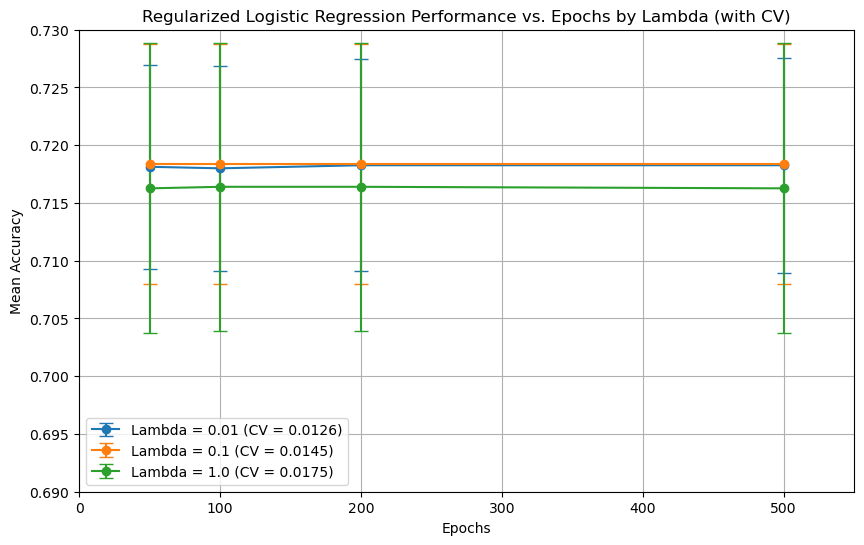

In [34]:
# Convert history_lgpeg to a DataFrame
history_df_lgpeg = pd.DataFrame(history_lgpeg)

# Extract 'lambda_param' and 'epochs' from the 'params' column
history_df_lgpeg['lambda_param'] = history_df_lgpeg['params'].apply(lambda x: x['lambda_param'])
history_df_lgpeg['epochs'] = history_df_lgpeg['params'].apply(lambda x: x['epochs'])

# Plot
plt.figure(figsize=(10, 6))
for lr in history_df_lgpeg['lambda_param'].unique():
    subset = history_df_lgpeg[history_df_lgpeg['lambda_param'] == lr].sort_values(by='epochs')
    plt.errorbar(
        subset['epochs'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Lambda = {lr} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

# Set custom axis ranges (adjust as needed)
plt.xlim(0, 550)  # Set x-axis range (0 to 550)
plt.ylim(0.69, 0.73)  # Set y-axis range (0.68 to 0.75)

# Add labels, title, legend, and grid
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Regularized Logistic Regression Performance vs. Epochs by Lambda (with CV)')
plt.legend()
plt.grid(True)
plt.show()


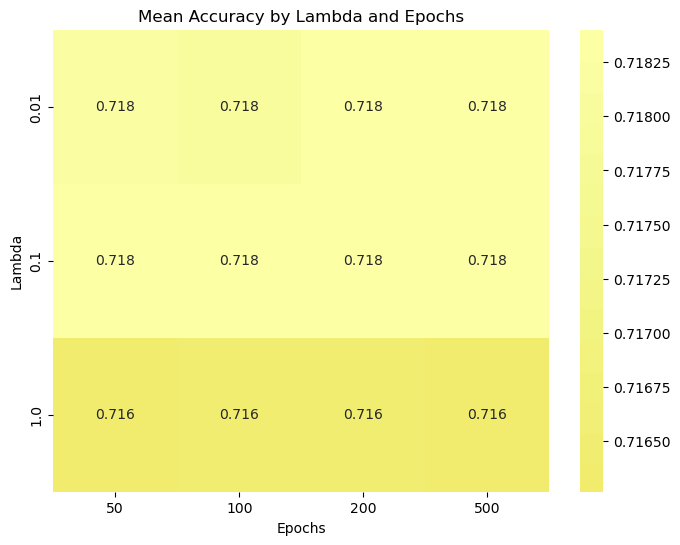

In [35]:
# Create a pivot table for the heatmap
heatmap_data = history_df_lgpeg.pivot_table(
    index='lambda_param',
    columns='epochs',
    values='mean_score'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='inferno', center=0.7)
plt.title('Mean Accuracy by Lambda and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Lambda')
plt.show()

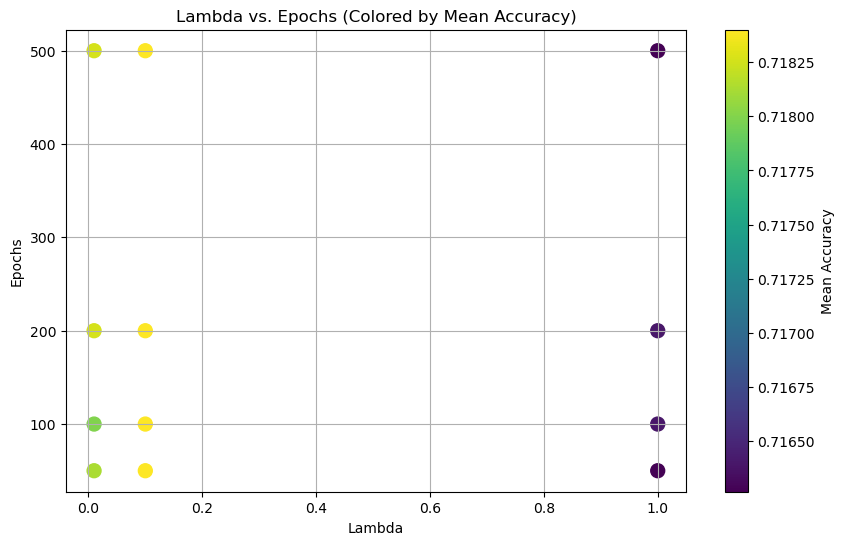

In [36]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    history_df_lgpeg['lambda_param'],
    history_df_lgpeg['epochs'],
    c=history_df_lgpeg['mean_score'],
    cmap='viridis',
    s=100  # Size of points
)
plt.colorbar(scatter, label='Mean Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Epochs')
plt.title('Lambda vs. Epochs (Colored by Mean Accuracy)')
plt.grid(True)
plt.show()

##### End of Logistic

##### Polynomial Expansion

### Polynomial Feature Expansion

In [37]:
poly_expander = PolynomialFeatureExpansion(degree=2)
X_train_poly = poly_expander.fit_transform(X_train)
X_test_poly = poly_expander.fit_transform(X_test)

#### Polynomial Perceptron Model

##### Model Training

In [38]:
# Model Cross-Validated
print("\nGrid Search for Perceptron...")
best_params_perceptron_poly, best_score_perceptron_poly ,best_cv_perceptron_poly, history_perceptron_poly = cross_validate(
    model_class=Perceptron,
    param_grid=perceptron_param_grid,
    X=X_train_poly,
    y=y_train,
    k=5,
    shuffle=True,
    random_state=42,
    verbose=True
)


Grid Search for Perceptron...
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 50, 'activation_func': 'sign'}
Mean Score: 0.9235, Std Dev: 0.0089, CV: 0.0096
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 100, 'activation_func': 'sign'}
Mean Score: 0.9188, Std Dev: 0.0117, CV: 0.0127
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 200, 'activation_func': 'sign'}
Mean Score: 0.9183, Std Dev: 0.0057, CV: 0.0062
Testing Hyperparameters: {'learning_rate': 0.01, 'epochs': 500, 'activation_func': 'sign'}
Mean Score: 0.9155, Std Dev: 0.0105, CV: 0.0115
Testing Hyperparameters: {'learning_rate': 0.1, 'epochs': 50, 'activation_func': 'sign'}
Mean Score: 0.9235, Std Dev: 0.0089, CV: 0.0096
Testing Hyperparameters: {'learning_rate': 0.1, 'epochs': 100, 'activation_func': 'sign'}
Mean Score: 0.9188, Std Dev: 0.0117, CV: 0.0127
Testing Hyperparameters: {'learning_rate': 0.1, 'epochs': 200, 'activation_func': 'sign'}
Mean Score: 0.9183, Std Dev: 0.0057, CV: 0.0062
T

##### Best Model and Test Accuracy

In [39]:
perceptron_poly_best = Perceptron(**best_params_perceptron_poly)
weights_p, bias_p = perceptron_poly_best.fit(X_train_poly, y_train)
y_pred_best = perceptron_poly_best.predict(X_test_poly)
accuracy_best_p = perceptron_poly_best.accuracy(X_test_poly, y_test)
loss_best_p = loss_calculator.compute_loss(y_test, y_pred_best)
print(f"Test Accuracy for Perceptron (deg 2 Polynomial) with Best Hyperparameters: {accuracy_best_p:.4f}")
print(f"Loss for Perceptron (deg 2 Polynomial) with Best Hyperparameters: {loss_best_p:.4f}")

Test Accuracy for Perceptron (deg 2 Polynomial) with Best Hyperparameters: 0.7172
Loss for Perceptron (deg 2 Polynomial) with Best Hyperparameters: 0.2828


##### Plots

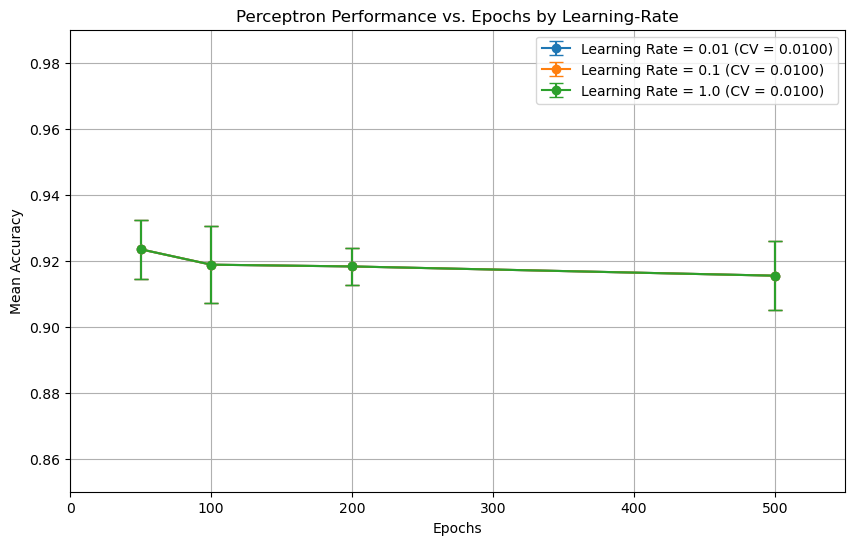

In [40]:
# Mean Accuracy by Epochs with Standard deviation

# Convert history_perceptron to a DataFrame
history_perceptron = pd.DataFrame(history_perceptron_poly)

# Extract 'learning_rate' and 'epochs' from the 'params' column
history_perceptron['learning_rate'] = history_perceptron['params'].apply(lambda x: x['learning_rate'])
history_perceptron['epochs'] = history_perceptron['params'].apply(lambda x: x['epochs'])

# Plot
plt.figure(figsize=(10, 6))
for lr in history_perceptron['learning_rate'].unique():
    subset = history_perceptron[history_perceptron['learning_rate'] == lr].sort_values(by='epochs')
    plt.errorbar(
        subset['epochs'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Learning Rate = {lr} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

plt.xlim(0, 550)  # Set x-axis range (0 to 550)
plt.ylim(0.85, 0.99)  # Set y-axis range (0.85 to 0.99)

plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Perceptron Performance vs. Epochs by Learning-Rate')
plt.legend()
plt.grid(True)
plt.show()

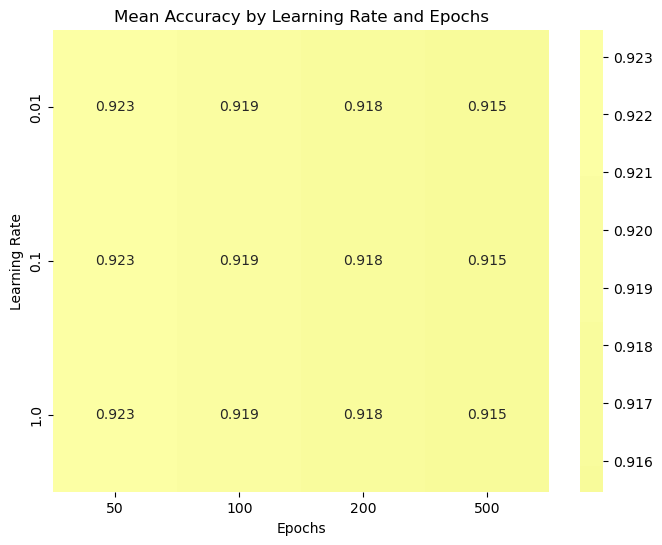

In [41]:
# heatmap
# Create a pivot table for the heatmap
heatmap_data = history_perceptron.pivot_table(
    index='learning_rate',
    columns='epochs',
    values='mean_score'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='inferno', center=0.6)
plt.title('Mean Accuracy by Learning Rate and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.show()

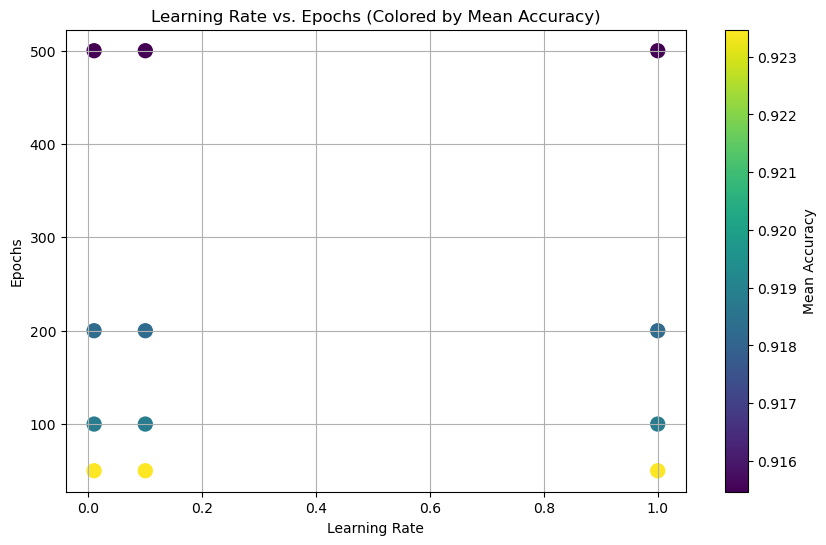

In [42]:
# Learning Rate & Epochs with Mean Accuracy

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    history_perceptron['learning_rate'],
    history_perceptron['epochs'],
    c=history_perceptron['mean_score'],
    cmap='viridis',
    s=100  # Size of points
)
plt.colorbar(scatter, label='Mean Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')
plt.title('Learning Rate vs. Epochs (Colored by Mean Accuracy)')
plt.grid(True)
plt.show()

#### SVM with Poly Expansion

##### Model Training

In [43]:
# Model
print("\nGrid Search for Pegasos SVM...")
best_params_svm_pegasos_poly, best_score_svm_pegasos_poly, best_cv_svm_poly, history_svm_pegasos_poly = cross_validate(
    model_class=SVM_pegasos.SVM_Pegasos,
    param_grid=svm_pegasos_param_grid,
    X=X_train_poly,
    y=y_train,
    k=5,
    shuffle=True,
    random_state=42,
    verbose=True
)


Grid Search for Pegasos SVM...
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 50}
Mean Score: 0.9432, Std Dev: 0.0067, CV: 0.0071
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 100}
Mean Score: 0.9432, Std Dev: 0.0067, CV: 0.0071
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 200}
Mean Score: 0.9431, Std Dev: 0.0069, CV: 0.0073
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 500}
Mean Score: 0.9431, Std Dev: 0.0074, CV: 0.0078
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 50}
Mean Score: 0.9131, Std Dev: 0.0084, CV: 0.0092
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 100}
Mean Score: 0.9127, Std Dev: 0.0095, CV: 0.0104
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 200}
Mean Score: 0.9123, Std Dev: 0.0093, CV: 0.0102
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 500}
Mean Score: 0.9123, Std Dev: 0.0090, CV: 0.0099
Testing Hyperparameters: {'lambda_param': 1, 'epochs': 50}
Mean Score: 0.8725, Std Dev

##### Best Model and Test Accuracy

In [44]:
svm_pegasos_poly_best = SVM_pegasos.SVM_Pegasos(**best_params_svm_pegasos_poly)
svm_pegasos_poly_best.fit(X_train_poly, y_train)

y_pred_svm_pegasos = svm_pegasos_poly_best.predict(X_test_poly) # Predictions

accuracy_svm_pegasos = svm_pegasos_poly_best.score(X_test_poly, y_test) # Accuracy
print(f"Test Accuracy for Pegasos SVM (deg 2 Polynomial) with Best Hyperparameters: {accuracy_svm_pegasos:.4f}")

loss_best_svm = loss_calculator.compute_loss(y_test, y_pred_svm_pegasos) # loss (0-1)

print(f"Loss for Pegasos SVM (deg 2 Polynomial) with Best Hyperparameters: {loss_best_svm:.4f}")

Test Accuracy for Pegasos SVM (deg 2 Polynomial) with Best Hyperparameters: 0.9416
Loss for Pegasos SVM (deg 2 Polynomial) with Best Hyperparameters: 0.0584


##### Plots

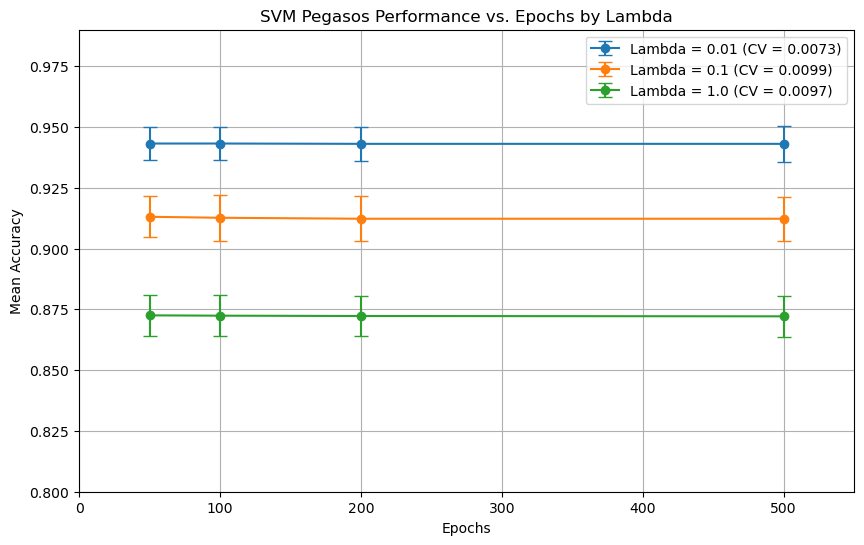

In [45]:
# Mean Accuracy by Epochs with Standard deviation

# Convert history_svm_pegasos to a DataFrame
history_df_svm = pd.DataFrame(history_svm_pegasos_poly)

# Extract 'lambda_param' and 'epochs' from the 'params' column
history_df_svm['lambda_param'] = history_df_svm['params'].apply(lambda x: x['lambda_param'])
history_df_svm['epochs'] = history_df_svm['params'].apply(lambda x: x['epochs'])

# Plot
plt.figure(figsize=(10, 6))
for lr in history_df_svm['lambda_param'].unique():
    subset = history_df_svm[history_df_svm['lambda_param'] == lr].sort_values(by='epochs')
    plt.errorbar(
        subset['epochs'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Lambda = {lr} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

plt.xlim(0, 550)  # Set x-axis range (0 to 550)
plt.ylim(0.80, 0.99)  # Set y-axis range (0.68 to 0.75)


plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.title('SVM Pegasos Performance vs. Epochs by Lambda')
plt.legend()
plt.grid(True)
plt.show()

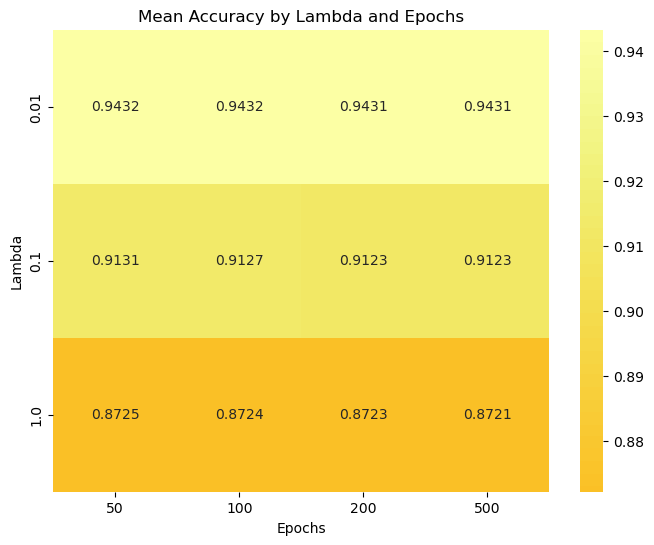

In [46]:
# HeatMap

# Create a pivot table for the heatmap
heatmap_data = history_df_svm.pivot_table(
    index='lambda_param',
    columns='epochs',
    values='mean_score'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='inferno', center=0.7)
plt.title('Mean Accuracy by Lambda and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Lambda')
plt.show()

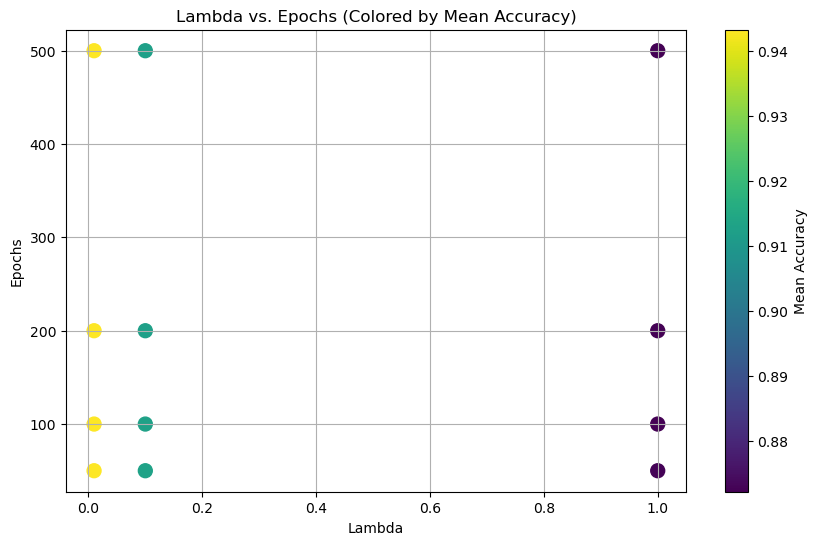

In [47]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    history_df_svm['lambda_param'],
    history_df_svm['epochs'],
    c=history_df_svm['mean_score'],
    cmap='viridis',
    s=100  # Size of points
)
plt.colorbar(scatter, label='Mean Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Epochs')
plt.title('Lambda vs. Epochs (Colored by Mean Accuracy)')
plt.grid(True)
plt.show()

#### Logistic with Poly Expansion

##### Model Training

In [48]:
# Grid Search for Logistic Regression Pegasos
print("\nGrid Search for Logistic Regression Pegasos...")
best_params_logreg_pegasos_poly, best_score_lgpeg_poly, best_cv_lgpeg_poly, history_lgpeg_poly = cross_validate(
    model_class=LogisticRegressionPegasos,
    param_grid=logreg_pegasos_param_grid,
    X=X_train_poly,
    y=y_train,
    k=5,
    shuffle=True,
    random_state=42,
    verbose=True
)


Grid Search for Logistic Regression Pegasos...
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 50}
Mean Score: 0.9385, Std Dev: 0.0063, CV: 0.0067
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 100}
Mean Score: 0.9384, Std Dev: 0.0068, CV: 0.0073
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 200}
Mean Score: 0.9385, Std Dev: 0.0066, CV: 0.0071
Testing Hyperparameters: {'lambda_param': 0.01, 'epochs': 500}
Mean Score: 0.9388, Std Dev: 0.0066, CV: 0.0070
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 50}
Mean Score: 0.9137, Std Dev: 0.0072, CV: 0.0079
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 100}
Mean Score: 0.9137, Std Dev: 0.0072, CV: 0.0079
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 200}
Mean Score: 0.9137, Std Dev: 0.0072, CV: 0.0079
Testing Hyperparameters: {'lambda_param': 0.1, 'epochs': 500}
Mean Score: 0.9137, Std Dev: 0.0072, CV: 0.0079
Testing Hyperparameters: {'lambda_param': 1, 'epochs': 50}
Mean Score:

##### Best Model

In [49]:
logreg_pegasos_poly_best = LogisticRegressionPegasos(**best_params_logreg_pegasos_poly)
logreg_pegasos_poly_best.fit(X_train_poly, y_train)
y_pred_logreg_pegasos = logreg_pegasos_poly_best.predict(X_test_poly)
accuracy_logreg_pegasos = logreg_pegasos_poly_best.score(X_test_poly, y_test)
loss_logreg_pegasos = loss_calculator.compute_loss(y_test, y_pred_logreg_pegasos)
print(f"Test Accuracy for Logistic Regression Pegasos (deg 2 Polynomial) with Best Hyperparameters: {accuracy_logreg_pegasos:.4f}")
print(f"Test Loss for Logistic Regression Pegasos (deg 2 Polynomial)with Best Hyperparameters: {loss_logreg_pegasos:.4f}")

Test Accuracy for Logistic Regression Pegasos (deg 2 Polynomial) with Best Hyperparameters: 0.9372
Test Loss for Logistic Regression Pegasos (deg 2 Polynomial)with Best Hyperparameters: 0.0628


##### Plots

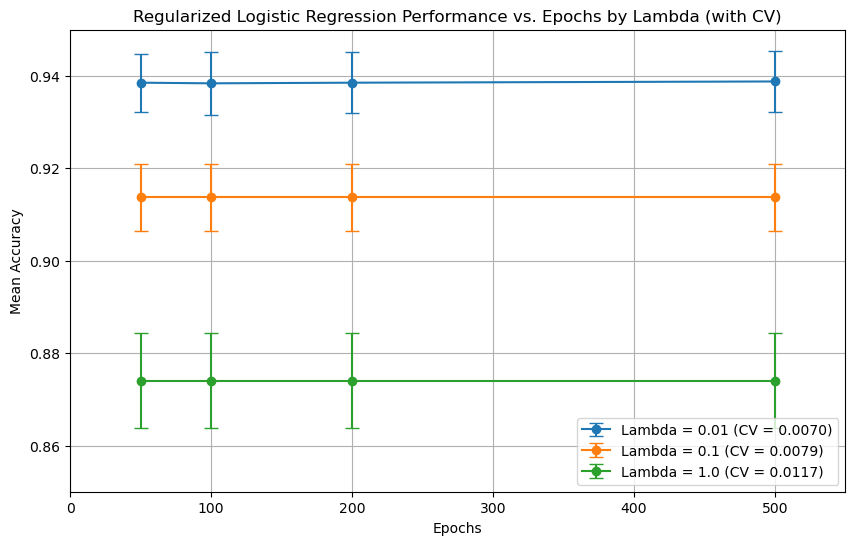

In [50]:
# Convert history_lgpeg to a DataFrame
history_df_lgpeg = pd.DataFrame(history_lgpeg_poly)

# Extract 'lambda_param' and 'epochs' from the 'params' column
history_df_lgpeg['lambda_param'] = history_df_lgpeg['params'].apply(lambda x: x['lambda_param'])
history_df_lgpeg['epochs'] = history_df_lgpeg['params'].apply(lambda x: x['epochs'])

# Plot
plt.figure(figsize=(10, 6))
for lr in history_df_lgpeg['lambda_param'].unique():
    subset = history_df_lgpeg[history_df_lgpeg['lambda_param'] == lr].sort_values(by='epochs')
    plt.errorbar(
        subset['epochs'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Lambda = {lr} (CV = {subset["cv"].mean():.4f})',  # Add CV to the legend
        capsize=5
    )

# Set custom axis ranges (adjust as needed)
plt.xlim(0, 550)  # Set x-axis range (0 to 550)
plt.ylim(0.85, 0.95)  # Set y-axis range (0.85 to 0.95)

# Add labels, title, legend, and grid
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Regularized Logistic Regression Performance vs. Epochs by Lambda (with CV)')
plt.legend()
plt.grid(True)
plt.show()


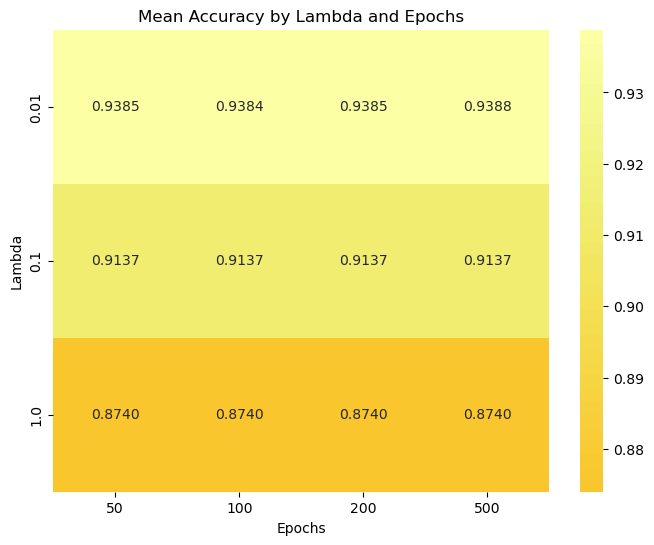

In [51]:
# Create a pivot table for the heatmap
heatmap_data = history_df_lgpeg.pivot_table(
    index='lambda_param',
    columns='epochs',
    values='mean_score'
)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='inferno', center=0.7)
plt.title('Mean Accuracy by Lambda and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Lambda')
plt.show()

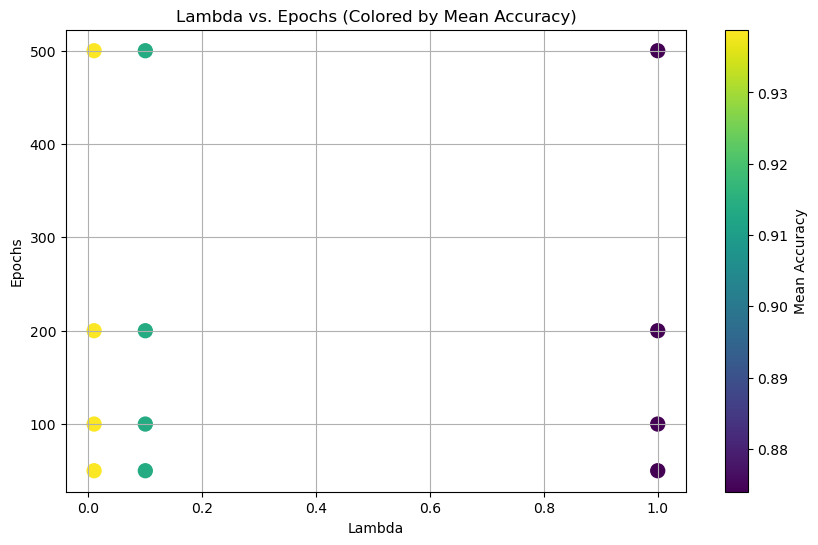

In [52]:
# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    history_df_lgpeg['lambda_param'],
    history_df_lgpeg['epochs'],
    c=history_df_lgpeg['mean_score'],
    cmap='viridis',
    s=100  # Size of points
)
plt.colorbar(scatter, label='Mean Accuracy')
plt.xlabel('Lambda')
plt.ylabel('Epochs')
plt.title('Lambda vs. Epochs (Colored by Mean Accuracy)')
plt.grid(True)
plt.show()

##### End of Logistic

##### Weight Comparison for Poly Expansions

In [53]:
# Function to compare weights of different models
def compare_weights(models, model_names):
    """
    Compares weights of different models.

    Parameters:
    models (list): List of trained models.
    model_names (list): List of corresponding model names.
    """
    for model, name in zip(models, model_names):
        print(f"\nWeights for {name} Model:")
        if hasattr(model, 'weights'):  # Check if model has weights attribute
            print(model.weights)
        else:
            print(f"No direct weight attribute found for {name} model.")

# Training models
perceptron_best.fit(X_train, y_train)
svm_pegasos_best.fit(X_train, y_train)
logreg_pegasos_best.fit(X_train, y_train)

# For models with Polynomial Features:
perceptron_poly_best.fit(X_train_poly, y_train)
svm_pegasos_poly_best.fit(X_train_poly, y_train)
logreg_pegasos_poly_best.fit(X_train_poly, y_train)

# Store models and their names for comparison
models = [
    perceptron_best,
    svm_pegasos_best,
    logreg_pegasos_best,
    perceptron_poly_best,
    svm_pegasos_poly_best,
    logreg_pegasos_poly_best
]

model_names = [
    "Perceptron",
    "Pegasos SVM",
    "Logistic Regression Pegasos",
    "Perceptron with Polynomial Features",
    "Pegasos SVM with Polynomial Features",
    "Logistic Regression Pegasos with Polynomial Features"
]

# Compare weights for all models
compare_weights(models, model_names)


Weights for Perceptron Model:
[ 0.01569562 -0.027697    0.01083035 -0.00755328 -0.00398106 -0.00305679
  0.00216763  0.05682532]

Weights for Pegasos SVM Model:
[ 0.12745166 -0.01306419  0.10088369 -0.16098056  0.16967422  0.15034592
  0.36987858  0.07458134 -0.04147306]

Weights for Logistic Regression Pegasos Model:
[ 0.20402015 -0.01651521  0.13513333 -0.25183331  0.20339681  0.24643115
  0.49605225  0.10277368]

Weights for Perceptron with Polynomial Features Model:
[ 0.38561539 -0.2141344   0.11160008 -0.22291356  0.6100209   0.15170631
  1.40105223  0.56909521  0.09454923  0.41643074  0.16854106  0.08116751
  0.22159622  0.20717086  0.22771606  0.22108504  0.15106096 -0.13848109
  0.00362564 -0.21468914  0.08949031  0.9047804   0.16008141 -0.01616914
  0.12997756  0.08077478  0.1109016   0.30285804  2.45490211  0.1057403
 -0.023904    0.10141754 -0.01990827  0.31580623  0.23048054 -0.15781175
 -0.83038335  0.17326316 -0.13934099 -0.05324466 -0.09774976  0.20532879
  0.0240804  -

### Kernelized Perceptron - Custom Grid Search

##### Parameter Grid

In [65]:
# Parameter grids for RBF and Polynomial kernels
param_grid_poly = {
    'kernel': ['poly'],
    'degree': [2, 3],  # Degree values for Polynomial kernel
}

param_grid_rbf = {
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1.0],  # Range of gamma values for RBF kernel
}

###### Polynomial Kernel

In [70]:
# Polynomial Kernel
print("Performing Custom Cross-Validation for Polynomial Kernel...")
model_poly = KernelizedPerceptron(kernel="poly")  # Instantiation
best_params_poly, best_accuracy_poly, best_cv_poly, history_kpp = cross_validate(
    model_class=KernelizedPerceptron,  # passing the class
    param_grid=param_grid_poly,
    X=X_train,
    y=y_train
)

print(f"Best Parameters for Polynomial Kernel: {best_params_poly}")
print(f"Best Accuracy for Polynomial Kernel: {best_accuracy_poly * 100:.2f}%")

Performing Custom Cross-Validation for Polynomial Kernel...
Testing Hyperparameters: {'kernel': 'poly', 'degree': 2}
Mean Score: 0.9191, Std Dev: 0.0051, CV: 0.0055
Testing Hyperparameters: {'kernel': 'poly', 'degree': 3}
Mean Score: 0.9463, Std Dev: 0.0097, CV: 0.0103

Best Parameters: {'kernel': 'poly', 'degree': 3} with Score: 0.9463
Best Parameters for Polynomial Kernel: {'kernel': 'poly', 'degree': 3}
Best Accuracy for Polynomial Kernel: 94.63%


In [127]:
# Implementing on Test Set
model_poly_final = KernelizedPerceptron(kernel="poly", degree=3)  # Final model with best params
model_poly_final.fit(X_train, y_train)

# Predictions and performance on the test set
y_pred_poly = model_poly_final.predict(X_test)
accuracy_poly_test = np.mean(y_pred_poly == y_test)  # Accuracy on test set
print(f"Test Accuracy for Polynomial Kernel: {accuracy_poly_test * 100:.2f}%")

# Loss calculation (if required)
loss_poly_test = np.mean(y_pred_poly != y_test)  # Loss on test set
print(f"Loss for Polynomial Kernel on Test Set: {loss_poly_test:.4f}")


Test Accuracy for Polynomial Kernel: 78.96%
Loss for Polynomial Kernel on Test Set: 0.2104


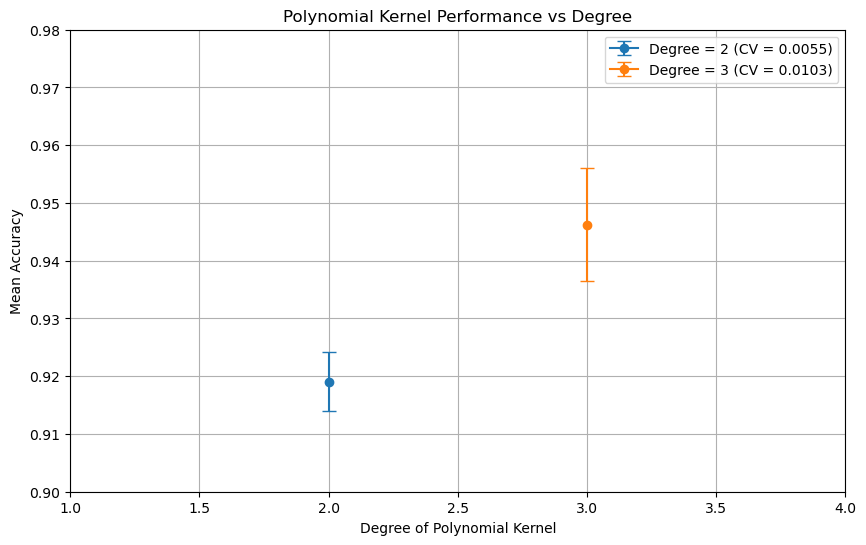

In [74]:
# Mean Accuracy by Epochs with Standard deviation

# Convert history_perceptron to a DataFrame
history_kpp_df = pd.DataFrame(history_kpp)

# Extract 'learning_rate' and 'epochs' from the 'params' column
history_kpp_df['degree'] = history_kpp_df['params'].apply(lambda x: x['degree'])
history_kpp_df['mean_score'] = history_kpp_df['mean_score']
history_kpp_df['std_dev'] = history_kpp_df['std_dev']
history_kpp_df['cv'] = history_kpp_df['cv']

# Plot the Mean Accuracy vs Degree (Polynomial Kernel)
plt.figure(figsize=(10, 6))
for degree in history_kpp_df['degree'].unique():
    subset = history_kpp_df[history_kpp_df['degree'] == degree]
    plt.errorbar(
        subset['degree'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Degree = {degree} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

# Set axis limits
plt.xlim(1, 4)  # Degree 1 to 4 (for example)
plt.ylim(0.90, 0.98)  # Adjusted to your accuracy range (0.90 to 0.98)

# Add labels, title, and legend
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Mean Accuracy')
plt.title('Polynomial Kernel Performance vs Degree')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

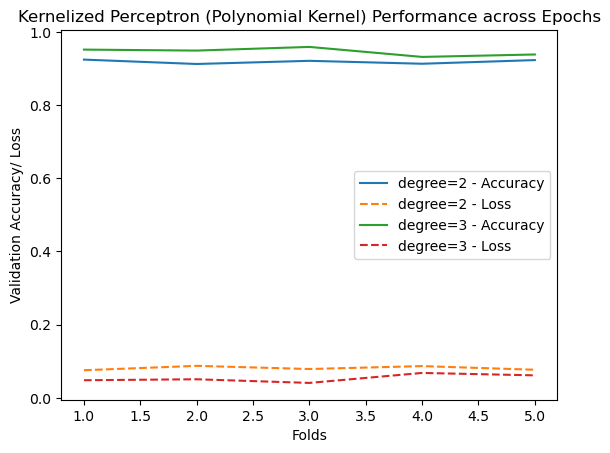

In [72]:
# Plot for Loss and Accuracy for Polynomial Kernel Perceptron
for entry in history_kpp:
    # Extract hyperparameters for labels
    degree = entry['params']['degree']

    # Plotting the scores (accuracy)
    plt.plot(range(1, len(entry['scores']) + 1), entry['scores'], 
             label=f"degree={degree} - Accuracy", linestyle='-')
    
    # Losses
    losses = [1 - score for score in entry['scores']]
    
    # Plotting the Loss
    plt.plot(range(1, len(entry['scores']) + 1), losses, 
             label=f"degree={degree} - Loss", linestyle='--')

plt.xlabel('Folds')
plt.ylabel('Validation Accuracy/ Loss')
plt.title('Kernelized Perceptron (Polynomial Kernel) Performance across Epochs')
plt.legend()
plt.show()

###### Gaussian (RBF) Kernel

In [57]:
# RBF/ Gaussian Kernel
print("Performing Custom Cross-Validation for RBF Kernel...")
model_rbf = KernelizedPerceptron(kernel="rbf") # Instantiation
best_params_rbf, best_accuracy_rbf, best_cv_rbf, history_kpg = cross_validate(
    model_class=KernelizedPerceptron, # passing the class
    param_grid=param_grid_rbf,
    X=X_train,
    y=y_train
)

print(f"Best Parameters for RBF Kernel: {best_params_rbf}")
print(f"Best Accuracy for RBF Kernel: {best_accuracy_rbf * 100:.2f}%")

Performing Custom Cross-Validation for RBF Kernel...
Testing Hyperparameters: {'gamma': 0.1}
Converged after 6 epochs.
Converged after 5 epochs.
Converged after 5 epochs.
Converged after 5 epochs.
Converged after 6 epochs.
Mean Score: 0.8213, Std Dev: 0.0044, CV: 0.0053
Testing Hyperparameters: {'gamma': 0.5}
Converged after 8 epochs.
Converged after 10 epochs.
Converged after 7 epochs.
Converged after 7 epochs.
Mean Score: 0.9017, Std Dev: 0.0052, CV: 0.0058
Testing Hyperparameters: {'gamma': 1.0}
Mean Score: 0.9372, Std Dev: 0.0063, CV: 0.0067

Best Parameters: {'gamma': 1.0} with Score: 0.9372
Best Parameters for RBF Kernel: {'gamma': 1.0}
Best Accuracy for RBF Kernel: 93.72%


In [128]:
# Final model for RBF Kernel with best parameters
model_rbf_final = KernelizedPerceptron(kernel="rbf", gamma=1.0)

# Fit the model on the training data
model_rbf_final.fit(X_train, y_train)

# Predictions on the test set
y_pred_rbf = model_rbf_final.predict(X_test)

# Evaluate accuracy on test set
accuracy_rbf_test = np.mean(y_pred_rbf == y_test)  # Calculate accuracy
print(f"Test Accuracy for RBF Kernel: {accuracy_rbf_test * 100:.2f}%")

# If you want to calculate the loss (optional):
loss_rbf_test = np.mean(y_pred_rbf != y_test)  # Misclassification rate
print(f"Loss for RBF Kernel on Test Set: {loss_rbf_test:.4f}")

Test Accuracy for RBF Kernel: 89.72%
Loss for RBF Kernel on Test Set: 0.1028


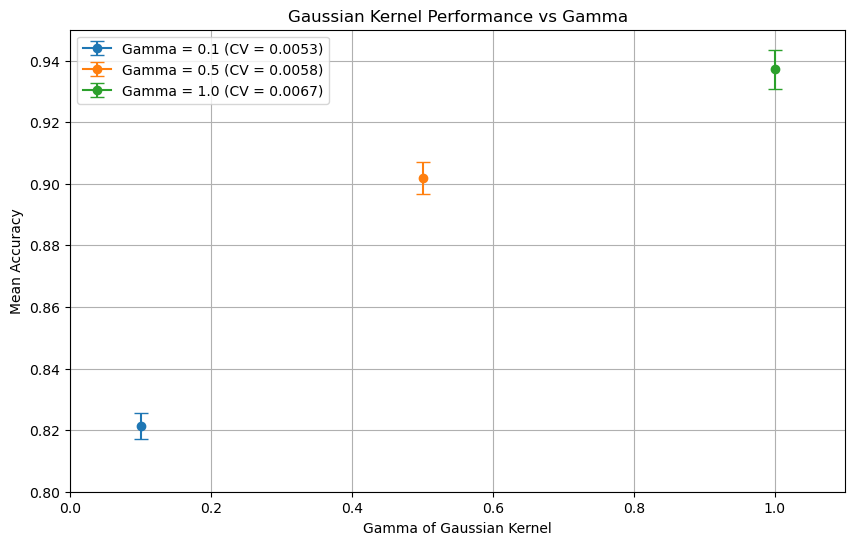

In [79]:
# Mean Accuracy by Epochs with Standard deviation

# Convert history_perceptron to a DataFrame
history_kpg_df = pd.DataFrame(history_kpg)

# Extract 'learning_rate' and 'epochs' from the 'params' column
history_kpg_df['gamma'] = history_kpg_df['params'].apply(lambda x: x['gamma'])
history_kpg_df['mean_score'] = history_kpg_df['mean_score']
history_kpg_df['std_dev'] = history_kpg_df['std_dev']
history_kpg_df['cv'] = history_kpg_df['cv']

# Plot the Mean Accuracy vs Degree (Polynomial Kernel)
plt.figure(figsize=(10, 6))
for gamma in history_kpg_df['gamma'].unique():
    subset = history_kpg_df[history_kpg_df['gamma'] == gamma]
    plt.errorbar(
        subset['gamma'],
        subset['mean_score'],
        yerr=subset['std_dev'],
        marker='o',
        label=f'Gamma = {gamma} (CV = {subset["cv"].mean():.4f})',
        capsize=5
    )

# Set axis limits
plt.xlim(0, 1.1)  # gamma 0.1 to 1
plt.ylim(0.80, 0.95)  # Adjusted to accuracy range

# Adding labels, title, and legend
plt.xlabel('Gamma of Gaussian Kernel')
plt.ylabel('Mean Accuracy')
plt.title('Gaussian Kernel Performance vs Gamma')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

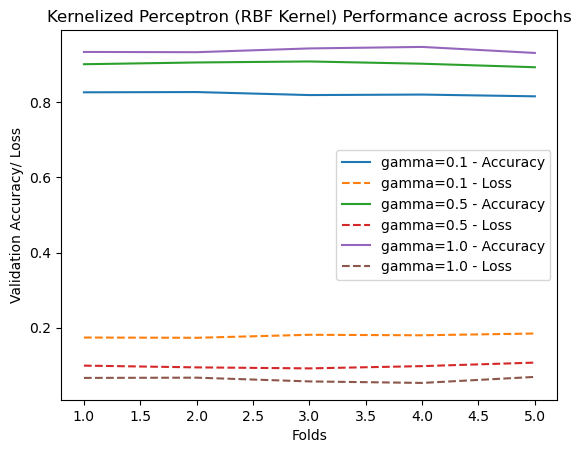

In [73]:
# Plot for Loss and Accuracy for RBF Kernel Perceptron
for entry in history_kpg:
    # Extract hyperparameters for labels
    gamma = entry['params']['gamma']

    # Plotting the Accuracy
    plt.plot(range(1, len(entry['scores']) + 1), entry['scores'], 
             label=f"gamma={gamma} - Accuracy", linestyle='-')
    
    # Losses
    losses = [1 - score for score in entry['scores']]
    
    # Plotting the Loss
    plt.plot(range(1, len(entry['scores']) + 1), losses, 
             label=f"gamma={gamma} - Loss", linestyle='--')

plt.xlabel('Folds')
plt.ylabel('Validation Accuracy/ Loss')
plt.title('Kernelized Perceptron (RBF Kernel) Performance across Epochs')
plt.legend()
plt.show()

### Kernalized Pegasos - Custom Grid Search

###### Parameter Grids

In [59]:
# Parameter grids for each kernel type
param_grid_poly = {
    'lambda_param': [0.01, 0.1, 1],
    'T': [50, 100, 200],
    'kernel': ['poly'],
    'degree': [2, 3],
    'batch_size': [32, 64]
}
param_grid_rbf = {
    'lambda_param': [0.01, 0.1, 1],
    'T': [50, 100, 200],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1, 1.5],
    'batch_size': [32, 64]
}

###### Polynomial Kernel

In [60]:
# Perform cross-validation to tune hyperparameters for Polynomial kernel (Pegasos)
best_params_poly_kpeg_p, best_score_poly_kpeg_p, best_cv_kpeg_p, history_kpeg_p = cross_validate(
    KernelizedPegasosSVM,
    param_grid_poly,
    X_train,
    y_train,
    k=5,  # 5-fold cross-validation
    shuffle=True,
    random_state=42,
    scoring=None,  # Default to accuracy
    verbose=True
)

Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'poly', 'degree': 2, 'batch_size': 32}
Mean Score: 0.8213, Std Dev: 0.0341, CV: 0.0415
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'poly', 'degree': 2, 'batch_size': 64}
Mean Score: 0.8593, Std Dev: 0.0110, CV: 0.0128
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'poly', 'degree': 3, 'batch_size': 32}
Mean Score: 0.7809, Std Dev: 0.0104, CV: 0.0133
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'poly', 'degree': 3, 'batch_size': 64}
Mean Score: 0.8001, Std Dev: 0.0100, CV: 0.0125
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 100, 'kernel': 'poly', 'degree': 2, 'batch_size': 32}
Mean Score: 0.8357, Std Dev: 0.0174, CV: 0.0208
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 100, 'kernel': 'poly', 'degree': 2, 'batch_size': 64}
Mean Score: 0.8705, Std Dev: 0.0164, CV: 0.0189
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 100, 'kernel': 'poly'

In [129]:
# Implementing on Test Set
model_kpegp_final = KernelizedPegasosSVM(kernel="poly", lambda_param=1, T=100, degree=2, batch_size=64)  # Final model with best params
model_kpegp_final.fit(X_train, y_train)

# Predictions and performance on the test set
y_pred_kpegp = model_kpegp_final.predict(X_test)
accuracy_poly_kpeg_test = np.mean(y_pred_kpegp == y_test)  # Accuracy on test set
print(f"Test Accuracy for Kernelized Pegasos SVM Polynomial Kernel: {accuracy_poly_kpeg_test * 100:.2f}%")

# Loss calculation (if required)
loss_poly_test = np.mean(y_pred_kpegp != y_test)  # Loss on test set
print(f"Loss for Kernelized Pegasos SVM Polynomial Kernel: {loss_poly_test:.4f}")


Test Accuracy for Kernelized Pegasos SVM Polynomial Kernel: 86.84%
Loss for Kernelized Pegasos SVM Polynomial Kernel: 0.1316


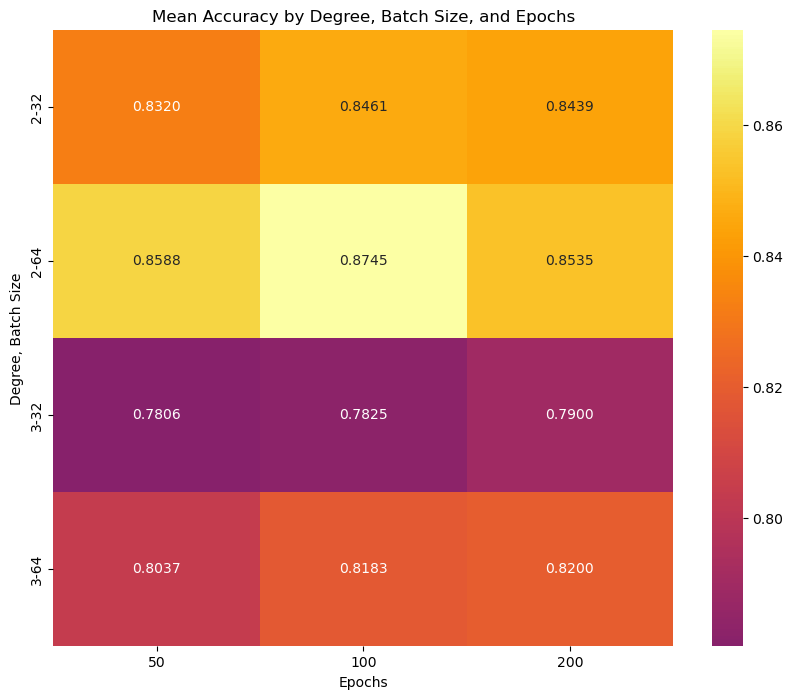

In [91]:
# Convert history_kpeg_p to a DataFrame
history_kpeg_p_df = pd.DataFrame(history_kpeg_p)

# Extract 'lambda_param', 'T', 'degree', and 'batch_size' from the 'params' column
history_kpeg_p_df['lambda_param'] = history_kpeg_p_df['params'].apply(lambda x: x['lambda_param'])
history_kpeg_p_df['T'] = history_kpeg_p_df['params'].apply(lambda x: x['T'])
history_kpeg_p_df['degree'] = history_kpeg_p_df['params'].apply(lambda x: x['degree'])
history_kpeg_p_df['batch_size'] = history_kpeg_p_df['params'].apply(lambda x: x['batch_size'])

# Create a pivot table for the heatmap
heatmap_data = history_kpeg_p_df.pivot_table(
    index=['degree', 'batch_size'],
    columns='T',
    values='mean_score'
)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='inferno', center=0.8)
plt.title('Mean Accuracy by Degree, Batch Size, and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Degree, Batch Size')
plt.show()

###### Gaussian (RBF) Kernel

In [61]:
# Perform cross-validation to tune hyperparameters for RBF kernel (Pegasos)
best_params_poly_kpeg_g, best_score_poly_kpeg_g,best_cv_poly_kpeg_g, history_kpeg_g = cross_validate(
    KernelizedPegasosSVM,
    param_grid_rbf,
    X_train,
    y_train,
    k=5,  # 5-fold cross-validation
    shuffle=True,
    random_state=42,
    scoring=None,  # Default to accuracy
    verbose=True
)

Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma': 0.1, 'batch_size': 32}
Mean Score: 0.7555, Std Dev: 0.0503, CV: 0.0666
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma': 0.1, 'batch_size': 64}
Mean Score: 0.7897, Std Dev: 0.0257, CV: 0.0326
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma': 0.5, 'batch_size': 32}
Mean Score: 0.8429, Std Dev: 0.0088, CV: 0.0104
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma': 0.5, 'batch_size': 64}
Mean Score: 0.8701, Std Dev: 0.0032, CV: 0.0037
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma': 1, 'batch_size': 32}
Mean Score: 0.8516, Std Dev: 0.0075, CV: 0.0088
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma': 1, 'batch_size': 64}
Mean Score: 0.8633, Std Dev: 0.0045, CV: 0.0052
Testing Hyperparameters: {'lambda_param': 0.01, 'T': 50, 'kernel': 'rbf', 'gamma

In [131]:
# Implementing on Test Set
model_kpegg_final = KernelizedPegasosSVM(**best_params_poly_kpeg_g)  # Final model with best params
model_kpegg_final.fit(X_train, y_train)

# Predictions and performance on the test set
y_pred_kpegg = model_kpegg_final.predict(X_test)
accuracy_poly_kpegg_test = np.mean(y_pred_kpegg == y_test)  # Accuracy on test set
print(f"Test Accuracy for Kernelized Pegasos SVM Gaussian Kernel: {accuracy_poly_kpegg_test * 100:.2f}%")

# Loss calculation (if required)
loss_poly_test_kpegg = np.mean(y_pred_kpegg != y_test)  # Loss on test set
print(f"Loss for Kernelized Pegasos SVM Gaussian Kernel: {loss_poly_test_kpegg:.4f}")


Test Accuracy for Kernelized Pegasos SVM Gaussian Kernel: 89.12%
Loss for Kernelized Pegasos SVM Gaussian Kernel: 0.1088


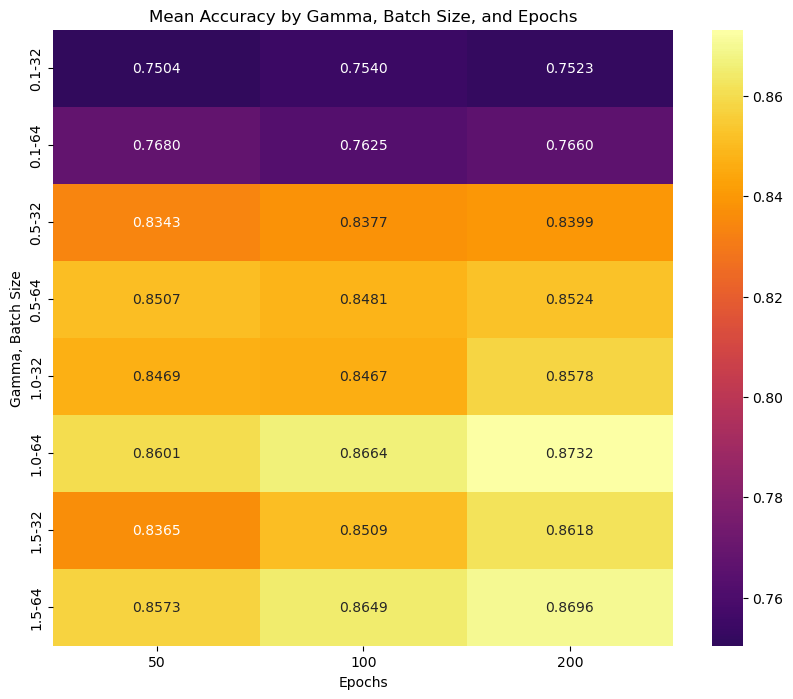

In [102]:
history_kpeg_g
# Convert history_kpeg_g to a DataFrame
history_kpeg_g_df = pd.DataFrame(history_kpeg_g)

# Extract 'lambda_param', 'T', 'gamma', and 'batch_size' from the 'params' column
history_kpeg_g_df['lambda_param'] = history_kpeg_g_df['params'].apply(lambda x: x['lambda_param'])
history_kpeg_g_df['T'] = history_kpeg_g_df['params'].apply(lambda x: x['T'])
history_kpeg_g_df['gamma'] = history_kpeg_g_df['params'].apply(lambda x: x['gamma'])
history_kpeg_g_df['batch_size'] = history_kpeg_g_df['params'].apply(lambda x: x['batch_size'])

# Create a pivot table for the heatmap
heatmap_data = history_kpeg_g_df.pivot_table(
    index=['gamma', 'batch_size'],
    columns='T',
    values='mean_score'
)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='inferno', center=0.8)
plt.title('Mean Accuracy by Gamma, Batch Size, and Epochs')
plt.xlabel('Epochs')
plt.ylabel('Gamma, Batch Size')
plt.show()

In [104]:
# Compare the best scores for RBF and Poly kernels
print("Best RBF Parameters:", best_params_rbf)
print("Best RBF Score:", best_score_poly_kpeg_g)

print("Best Polynomial Parameters:", best_params_poly)
print("Best Polynomial Score:", best_score_poly_kpeg_p)

Best RBF Parameters: {'gamma': 1.0}
Best RBF Score: 0.8784000000000001
Best Polynomial Parameters: {'kernel': 'poly', 'degree': 3}
Best Polynomial Score: 0.8836


###### Plots

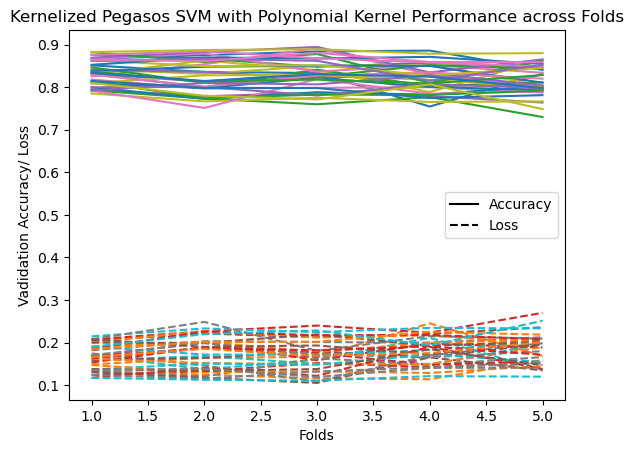

In [133]:
# Plot for Loss and Accuracy for Polynomial Kernel (Pegasos)
for entry in history_kpeg_p:
    # Extract hyperparameters for labels
    degree = entry['params']['degree']
    lambda_param = entry['params']['lambda_param']
    
    # Plotting the Accuracy
    plt.plot(range(1, len(entry['scores']) + 1), entry['scores'], 
             linestyle='-')
    
    # Losses
    losses = [1 - score for score in entry['scores']]
    
    # Plotting the Loss
    plt.plot(range(1, len(entry['scores']) + 1), losses, 
             linestyle='--')

accuracy_line = plt.Line2D([0], [0], color='black', linestyle='-', label='Accuracy')
loss_line = plt.Line2D([0], [0], color='black', linestyle='--', label='Loss')

plt.xlabel('Folds')
plt.ylabel('Vadidation Accuracy/ Loss')
plt.title('Kernelized Pegasos SVM with Polynomial Kernel Performance across Folds')
plt.legend(handles=[accuracy_line, loss_line], loc='best')
plt.show()

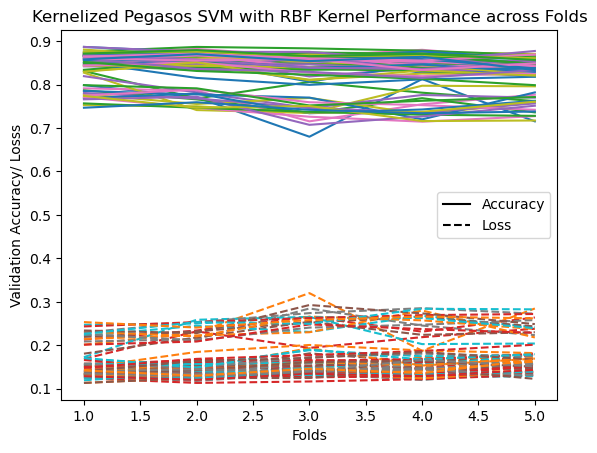

In [132]:
# Plot for Loss and Accuracy for RBF Kernel (Pegasos)
for entry in history_kpeg_g:
    # Extract hyperparameters for labels
    gamma = entry['params']['gamma']
    lambda_param = entry['params']['lambda_param']

    # Plotting the scores
    plt.plot(range(1, len(entry['scores']) + 1), entry['scores'], 
             linestyle='-')
    
    # Losses
    losses = [1 - score for score in entry['scores']]
    
    # Plotting the loss
    plt.plot(range(1, len(entry['scores']) + 1), losses, 
             linestyle='--')


accuracy_line = plt.Line2D([0], [0], color='black', linestyle='-', label='Accuracy')
loss_line = plt.Line2D([0], [0], color='black', linestyle='--', label='Loss')


plt.xlabel('Folds')
plt.ylabel('Validation Accuracy/ Losss')
plt.title('Kernelized Pegasos SVM with RBF Kernel Performance across Folds')
plt.legend(handles=[accuracy_line, loss_line], loc='best')
plt.show()

#### End of Current Analysis